<a href="https://colab.research.google.com/github/muhammedafsalpm/Emergio_Games_Training/blob/main/Covid_EDA_Emergio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA for Covid Dataset**

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
import zipfile
import pandas as pd
import os

zip_file_path = '/content/Covid.zip'

dataframes = {}

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()

    for file_name in file_list:
        if file_name.endswith('.csv'):
            with zip_ref.open(file_name) as file:
                df = pd.read_csv(file)
                variable_name = os.path.splitext(file_name)[0]
                dataframes[variable_name] = df

# **1. Understanding the Data**

In [227]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511    41128772   
1            64.83                    0.511    41128772   
2            64.83                    0.511    41128772   
3            64.83                    0.511    41128772   
4            64.83                    0.511    41128772   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [229]:
df.shape

(429435, 67)

In [230]:
df.duplicated().sum()

0

In [231]:
df.describe()

total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  4.118040e+05  4.101590e+05        4.089290e+05  4.118040e+05   
mean   7.365292e+06  8.017360e+03        8.041026e+03  8.125957e+04   
std    4.477582e+07  2.296649e+05        8.661611e+04  4.411901e+05   
min    0.000000e+00  0.000000e+00        0.000000e+00  0.000000e+00   
25%    6.280750e+03  0.000000e+00        0.000000e+00  4.300000e+01   
50%    6.365300e+04  0.000000e+00        1.200000e+01  7.990000e+02   
75%    7.582720e+05  0.000000e+00        3.132860e+02  9.574000e+03   
max    7.758668e+08  4.423623e+07        6.319461e+06  7.057132e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  410608.000000        409378.000000            411804.000000   
mean       71.852139            72.060873            112096.199396   
std      1368.322990           513.636567            162240.412419   
min         0.000000             0.000000                 0.000000   
25%         0.000000             0.000000              1916.100500   
50%         0.000000             0.000000             29145.475000   
75%         0.000000             3.143000            156770.190000   
max    103719.000000         14817.000000            763598.600000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count          410159.000000                   408929.000000   
mean              122.357074                      122.713844   
std              1508.778583                      559.701638   
min                 0.000000                        0.000000   
25%                 0.000000                        0.000000   
50%                 0.000000                        2.794000   
75%                 0.000000                       56.253000   
max            241758.230000                    34536.890000   

       total_deaths_per_million  ...   male_smokers  handwashing_facilities  \
count             411804.000000  ...  243817.000000           161741.000000   
mean                 835.514313  ...      33.097723               50.649264   
std                 1134.932671  ...      13.853948               31.905375   
min                    0.000000  ...       7.700000                1.188000   
25%                   24.568000  ...      22.600000               20.859000   
50%                  295.089000  ...      33.100000               49.542000   
75%                 1283.817000  ...      41.500000               82.502000   
max                 6601.110000  ...      78.100000              100.000000   

       hospital_beds_per_thousand  life_expectancy  human_development_index  \
count               290689.000000    390299.000000            319127.000000   
mean                     3.106912        73.702098                 0.722139   
std                      2.549205         7.387914                 0.148903   
min                      0.100000        53.280000                 0.394000   
25%                      1.300000        69.500000                 0.602000   
50%                      2.500000        75.050000                 0.740000   
75%                      4.210000        79.460000                 0.829000   
max                     13.800000        86.750000                 0.957000   

         population  excess_mortality_cumulative_absolute  \
count  4.294350e+05                          1.341100e+04   
mean   1.520336e+08                          5.604765e+04   
std    6.975408e+08                          1.568691e+05   
min    4.700000e+01                         -3.772610e+04   
25%    5.237980e+05                          1.765000e+02   
50%    6.336393e+06                          6.815199e+03   
75%    3.296952e+07                          3.912804e+04   
max    7.975105e+09                          1.349776e+06   

       excess_mortality_cumulative  excess_mortality  \
count                 13411.000000      13411.000000   
mean                      9.766431         10.925353   
std               

In [232]:
df.isna().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [233]:
# Check Missing Values Percentage:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing Values Percentage:")
print(missing_percentage)

Missing Values Percentage:
iso_code                                    0.000000
continent                                   6.176721
location                                    0.000000
date                                        0.000000
total_cases                                 4.105627
                                             ...    
population                                  0.000000
excess_mortality_cumulative_absolute       96.877059
excess_mortality_cumulative                96.877059
excess_mortality                           96.877059
excess_mortality_cumulative_per_million    96.877059
Length: 67, dtype: float64


In [234]:
missing_percentage[missing_percentage >= 70].sort_values()

tests_units                                75.132907
new_tests_smoothed_per_thousand            75.790283
new_tests_smoothed                         75.790283
positive_rate                              77.662044
tests_per_case                             78.029737
total_vaccinations                         80.109446
total_vaccinations_per_hundred             80.109446
people_vaccinated_per_hundred              81.107269
people_vaccinated                          81.107269
total_tests                                81.513617
total_tests_per_thousand                   81.513617
people_fully_vaccinated                    81.822395
people_fully_vaccinated_per_hundred        81.822395
new_tests_per_thousand                     82.441347
new_tests                                  82.441347
new_vaccinations                           83.473401
total_boosters                             87.518484
total_boosters_per_hundred                 87.518484
hosp_patients_per_million                  90.532677
hosp_patients                              90.532677
icu_patients                               90.891287
icu_patients_per_million                   90.891287
weekly_hosp_admissions_per_million         94.295528
weekly_hosp_admissions                     94.295528
excess_mortality_cumulative_absolute       96.877059
excess_mortality_cumulative                96.877059
excess_mortality                           96.877059
excess_mortality_cumulative_per_million    96.877059
weekly_icu_admissions_per_million          97.440125
weekly_icu_admissions                      97.440125
dtype: float64

In [235]:
missing_percentage[missing_percentage < 70].sort_values()

iso_code                                       0.000000
date                                           0.000000
population                                     0.000000
location                                       0.000000
total_cases                                    4.105627
total_deaths                                   4.105627
total_cases_per_million                        4.105627
total_deaths_per_million                       4.105627
new_deaths                                     4.384133
new_deaths_per_million                         4.384133
new_cases                                      4.488689
new_cases_per_million                          4.488689
new_deaths_smoothed                            4.670555
new_deaths_smoothed_per_million                4.670555
new_cases_smoothed                             4.775111
new_cases_smoothed_per_million                 4.775111
continent                                      6.176721
life_expectancy                                9.113370
population_density                            16.054350
diabetes_prevalence                           19.449742
median_age                                    22.068998
aged_70_older                                 22.848627
cardiovasc_death_rate                         23.419144
gdp_per_capita                                23.552575
aged_65_older                                 24.722018
human_development_index                       25.686774
hospital_beds_per_thousand                    32.308964
female_smokers                                42.444142
male_smokers                                  43.223771
extreme_poverty                               50.633740
stringency_index                              54.314390
new_vaccinations_smoothed_per_million         54.584745
new_vaccinations_smoothed                     54.584745
new_people_vaccinated_smoothed_per_hundred    55.248874
new_people_vaccinated_smoothed                55.248874
reproduction_rate                             56.962753
handwashing_facilities                        62.336326
dtype: float64

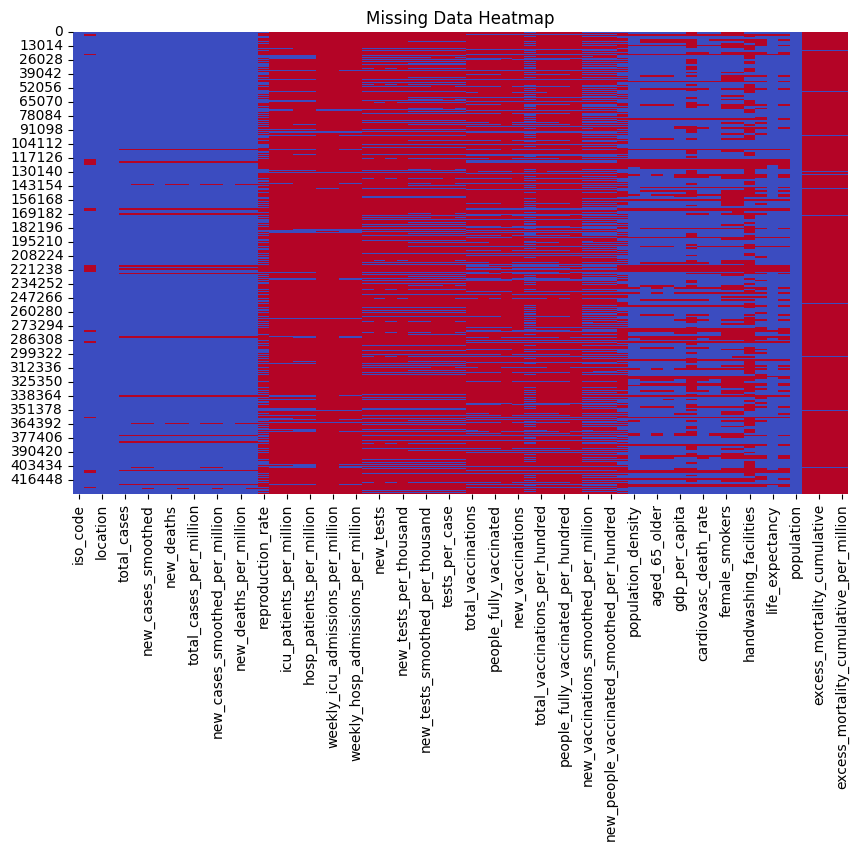

In [236]:
# Visualize Missing Data:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title('Missing Data Heatmap')
plt.show()

# **2. Data Cleaning & Data Transformation**

In [237]:
# Convert `date` to `datetime` and create time-based features:
df['date'] = pd.to_datetime(df['date'])

In [238]:
df['date']

0        2020-01-05
1        2020-01-06
2        2020-01-07
3        2020-01-08
4        2020-01-09
            ...    
429430   2024-07-31
429431   2024-08-01
429432   2024-08-02
429433   2024-08-03
429434   2024-08-04
Name: date, Length: 429435, dtype: datetime64[ns]

In [239]:
df['date'].dt.year

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
429430    2024
429431    2024
429432    2024
429433    2024
429434    2024
Name: date, Length: 429435, dtype: int32

In [240]:
df['date'].dtype

dtype('<M8[ns]')

In [241]:
df.columns[df.isnull().any()]

Index(['continent', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people

In [242]:
df.columns[df.isnull().any()].shape

(63,)

In [243]:
df['continent'].isna().sum()

26525

In [244]:
# To fill Continent

df['continent'].value_counts()

continent
Africa           95419
Europe           91031
Asia             84199
North America    68638
Oceania          40183
South America    23440
Name: count, dtype: int64

In [245]:
null_continent = df['continent'].isna()

df.loc[null_continent, 'location'].value_counts()

location
High-income countries            3026
European Union (27)              3024
Upper-middle-income countries    3013
Lower-middle-income countries    2983
Low-income countries             2724
Asia                             1684
Europe                           1684
World                            1684
Oceania                          1681
Africa                           1674
North America                    1674
South America                    1674
Name: count, dtype: int64

In [246]:
df.loc[null_continent, 'location'].value_counts().sum()

26525

In [247]:
df['iso_code'].nunique()

255

In [248]:
df['continent'].nunique()

6

In [249]:
df['location'].nunique()

255

In [250]:

location_to_continent = {
    'High-income countries': 'Income Category',
    'Upper-middle-income countries': 'Income Category',
    'Lower-middle-income countries': 'Income Category',
    'Low-income countries': 'Income Category',
    'European Union (27)': 'Europe',
    'Asia': 'Asia',
    'Europe': 'Europe',
    'World': 'Global',
    'Oceania': 'Oceania',
    'Africa': 'Africa',
    'North America': 'North America',
    'South America': 'South America'
}

df.loc[df['location'].isin(location_to_continent.keys()), 'continent'] = df['location'].map(location_to_continent)

df['continent'].isnull().sum()

0

I will remove columns with 80% or more missing values.

In [251]:

columns_to_drop = [
    'total_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
    'people_vaccinated', 'total_tests', 'total_tests_per_thousand', 'people_fully_vaccinated',
    'people_fully_vaccinated_per_hundred', 'new_tests_per_thousand', 'new_tests',
    'new_vaccinations', 'total_boosters', 'total_boosters_per_hundred', 'hosp_patients_per_million',
    'hosp_patients', 'icu_patients', 'icu_patients_per_million', 'weekly_hosp_admissions_per_million',
    'weekly_hosp_admissions', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
    'excess_mortality', 'excess_mortality_cumulative_per_million', 'weekly_icu_admissions_per_million',
    'weekly_icu_admissions'
]

df.drop(columns=columns_to_drop, inplace=True)

# Verifying the columns were dropped
print(df.columns)


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units',
       'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'hu

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  object        
 1   continent                                   429435 non-null  object        
 2   location                                    429435 non-null  object        
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_deaths                                  410608 non-null  float64      

In [253]:
# Check Missing Values Percentage:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing Values Percentage:")
print(missing_percentage)

Missing Values Percentage:
iso_code                                       0.000000
continent                                      0.000000
location                                       0.000000
date                                           0.000000
total_cases                                    4.105627
new_cases                                      4.488689
new_cases_smoothed                             4.775111
total_deaths                                   4.105627
new_deaths                                     4.384133
new_deaths_smoothed                            4.670555
total_cases_per_million                        4.105627
new_cases_per_million                          4.488689
new_cases_smoothed_per_million                 4.775111
total_deaths_per_million                       4.105627
new_deaths_per_million                         4.384133
new_deaths_smoothed_per_million                4.670555
reproduction_rate                             56.962753
new_tests_smoothed   

I will impute missing values in the columns 'life_expectancy', 'population_density', 'gdp_per_capita', 'human_development_index', 'median_age', 'aged_65_older', 'aged_70_older', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', and 'male_smokers' using data from the World Health Organization (WHO).

**life_expectancy** -  filling in missing values using data from the WHO 2020 statistics

In [254]:

df_null_life_expectancy = df[df['life_expectancy'].isnull()]

df_null_life_expectancy[['location', 'life_expectancy']]

df_null_life_expectancy['location'].value_counts()

location
High-income countries            3026
European Union (27)              3024
Upper-middle-income countries    3013
Lower-middle-income countries    2983
Low-income countries             2724
Europe                           1684
Asia                             1684
Oceania                          1681
South America                    1674
Saint Barthelemy                 1674
Pitcairn                         1674
Africa                           1674
North America                    1674
Kosovo                           1674
Jersey                           1674
Guernsey                         1674
Northern Ireland                 1372
England                          1359
Scotland                         1305
Wales                            1198
Northern Cyprus                   691
Name: count, dtype: int64

In [255]:
life_expectancy_values = {
    "High-income countries": 81.1,
    "European Union (27)": 81.3,
    "Upper-middle-income countries": 75.3,
    "Lower-middle-income countries": 68.2,
    "Low-income countries": 64.1,
    "Europe": 78.2,
    "Asia": 73.6,
    "Oceania": 79.9,
    "South America": 76.6,
    "Saint Barthelemy": 79.0,
    "Pitcairn": 80.0,
    "Africa": 64.5,
    "North America": 79.5,
    "Kosovo": 72.3,
    "Jersey": 82.3,
    "Guernsey": 82.4,
    "Northern Ireland": 79.9,
    "England": 81.3,
    "Scotland": 79.2,
    "Wales": 80.4,
    "Northern Cyprus": 78.9
}

df['life_expectancy'] = df['life_expectancy'].fillna(df['location'].map(life_expectancy_values))


In [256]:
df['life_expectancy'].isnull().sum()

0

**population_density** - filling in missing values using data from the 2020 statistics

In [257]:
df_null_population_density = df[df['population_density'].isnull()]

df_null_population_density[['location', 'population_density']]

df_null_population_density['location'].value_counts()

location
High-income countries              3026
European Union (27)                3024
Upper-middle-income countries      3013
Lower-middle-income countries      2983
Low-income countries               2724
Asia                               1684
Europe                             1684
Oceania                            1681
Africa                             1674
Saint Pierre and Miquelon          1674
Reunion                            1674
Saint Barthelemy                   1674
Saint Helena                       1674
South Sudan                        1674
South America                      1674
Syria                              1674
Tokelau                            1674
Vatican                            1674
Wallis and Futuna                  1674
Pitcairn                           1674
North America                      1674
Guernsey                           1674
Cook Islands                       1674
Anguilla                           1674
Niue                               1674
Montserrat                         1674
Mayotte                            1674
Martinique                         1674
Jersey                             1674
Bonaire Sint Eustatius and Saba    1674
Guadeloupe                         1674
French Guiana                      1674
Falkland Islands                   1674
Northern Ireland                   1372
England                            1359
Taiwan                             1348
Scotland                           1305
Wales                              1198
Northern Cyprus                     691
Western Sahara                        1
Name: count, dtype: int64

In [258]:

population_density_values = {
    "High-income countries": 150.00,
    "European Union (27)": 114.00,
    "Upper-middle-income countries": 153.00,
    "Lower-middle-income countries": 130.00,
    "Low-income countries": 40.00,
    "Asia": 150.00,
    "Europe": 107.00,
    "Oceania": 5.00,
    "Africa": 44.00,
    "Saint Pierre and Miquelon": 30.00,
    "Reunion": 341.00,
    "Saint Barthelemy": 60.00,
    "Saint Helena": 45.00,
    "South Sudan": 19.00,
    "South America": 23.00,
    "Syria": 90.00,
    "Tokelau": 5.00,
    "Vatican": 2000.00,
    "Wallis and Futuna": 30.00,
    "Pitcairn": 18.00,
    "North America": 22.00,
    "Guernsey": 847.00,
    "Cook Islands": 20.00,
    "Anguilla": 95.00,
    "Niue": 25.00,
    "Montserrat": 98.00,
    "Mayotte": 700.00,
    "Martinique": 351.00,
    "Jersey": 870.00,
    "Bonaire Sint Eustatius and Saba": 125.00,
    "Guadeloupe": 264.00,
    "French Guiana": 4.00,
    "Falkland Islands": 0.29,
    "Northern Ireland": 134.00,
    "England": 430.00,
    "Taiwan": 673.00,
    "Scotland": 70.00,
    "Wales": 148.00,
    "Northern Cyprus": 120.00,
    "Western Sahara": 2.00
}


df['population_density'] = df['population_density'].fillna(df['location'].map(population_density_values))

df['population_density'].isnull().sum()

0

**gdp_per_capita** - filling in missing values using data from the 2020 statistics

In [259]:
df_null_gdp_per_capita = df[df['gdp_per_capita'].isnull()]

df_null_gdp_per_capita[['location', 'gdp_per_capita']]

df_null_gdp_per_capita['location'].value_counts()

location
High-income countries              3026
European Union (27)                3024
Upper-middle-income countries      3013
Lower-middle-income countries      2983
Low-income countries               2724
Faroe Islands                      2068
Europe                             1684
Asia                               1684
Oceania                            1681
Africa                             1674
Pitcairn                           1674
North Korea                        1674
Northern Mariana Islands           1674
Saint Barthelemy                   1674
North America                      1674
Niue                               1674
Reunion                            1674
Saint Pierre and Miquelon          1674
Saint Helena                       1674
Saint Martin (French part)         1674
Montserrat                         1674
Somalia                            1674
South America                      1674
Syria                              1674
Tokelau                            1674
Turks and Caicos Islands           1674
United States Virgin Islands       1674
Vatican                            1674
Wallis and Futuna                  1674
New Caledonia                      1674
Mayotte                            1674
Monaco                             1674
Gibraltar                          1674
Andorra                            1674
Anguilla                           1674
Bonaire Sint Eustatius and Saba    1674
British Virgin Islands             1674
Cook Islands                       1674
Cuba                               1674
Curacao                            1674
Falkland Islands                   1674
American Samoa                     1674
French Polynesia                   1674
French Guiana                      1674
Greenland                          1674
Guadeloupe                         1674
Guam                               1674
Guernsey                           1674
Isle of Man                        1674
Jersey                             1674
Liechtenstein                      1674
Martinique                         1674
Northern Ireland                   1372
England                            1359
Taiwan                             1348
Scotland                           1305
Wales                              1198
Northern Cyprus                     691
Western Sahara                        1
Name: count, dtype: int64

In [260]:

gdp_per_capita_values = {
    "High-income countries": 48000.00,
    "European Union (27)": 30000.00,
    "Upper-middle-income countries": 8000.00,
    "Lower-middle-income countries": 2200.00,
    "Low-income countries": 800.00,
    "Faroe Islands": 68232.00,
    "Europe": 36000.00,
    "Asia": 10000.00,
    "Oceania": 42000.00,
    "Africa": 1500.00,
    "Pitcairn": 18000.00,
    "North Korea": 1000.00,
    "Northern Mariana Islands": 36049.00,
    "Saint Barthelemy": 36000.00,
    "North America": 63000.00,
    "Niue": 24000.00,
    "Reunion": 22000.00,
    "Saint Pierre and Miquelon": 30000.00,
    "Saint Helena": 10000.00,
    "Saint Martin (French part)": 35000.00,
    "Montserrat": 23000.00,
    "Somalia": 500.00,
    "South America": 7000.00,
    "Syria": 1200.00,
    "Tokelau": 10000.00,
    "Turks and Caicos Islands": 32000.00,
    "United States Virgin Islands": 32000.00,
    "Vatican": 20000.00,
    "Wallis and Futuna": 15000.00,
    "New Caledonia": 30000.00,
    "Mayotte": 11000.00,
    "Monaco": 190000.00,
    "Gibraltar": 72000.00,
    "Andorra": 49000.00,
    "Anguilla": 34000.00,
    "Bonaire Sint Eustatius and Saba": 25000.00,
    "British Virgin Islands": 33000.00,
    "Cook Islands": 15000.00,
    "Cuba": 8200.00,
    "Curacao": 24000.00,
    "Falkland Islands": 45000.00,
    "American Samoa": 12000.00,
    "French Polynesia": 21000.00,
    "French Guiana": 25000.00,
    "Greenland": 35000.00,
    "Guadeloupe": 24000.00,
    "Guam": 32000.00,
    "Guernsey": 61000.00,
    "Isle of Man": 47000.00,
    "Jersey": 56000.00,
    "Liechtenstein": 139000.00,
    "Martinique": 24000.00,
    "Northern Ireland": 35000.00,
    "England": 39000.00,
    "Taiwan": 28000.00,
    "Scotland": 38000.00,
    "Wales": 35000.00,
    "Northern Cyprus": 12000.00,
    "Western Sahara": 1000.00
}

df['gdp_per_capita'] = df['gdp_per_capita'].fillna(df['location'].map(gdp_per_capita_values))

df['gdp_per_capita'].isnull().sum()

0

**human_development_index** - filling in missing values using data from the 2020 statistics - 2020 Human Development Report (HDR)

In [261]:
df_null_human_development_index = df[df['human_development_index'].isnull()]

df_null_human_development_index[['location', 'human_development_index']]

df_null_human_development_index['location'].unique().tolist()

['Africa',
 'American Samoa',
 'Anguilla',
 'Aruba',
 'Asia',
 'Bermuda',
 'Bonaire Sint Eustatius and Saba',
 'British Virgin Islands',
 'Cayman Islands',
 'Cook Islands',
 'Curacao',
 'England',
 'Europe',
 'European Union (27)',
 'Faroe Islands',
 'Falkland Islands',
 'French Guiana',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Guernsey',
 'High-income countries',
 'Isle of Man',
 'Jersey',
 'Kosovo',
 'Low-income countries',
 'Lower-middle-income countries',
 'Macao',
 'Martinique',
 'Mayotte',
 'Monaco',
 'Montserrat',
 'Nauru',
 'New Caledonia',
 'Niue',
 'North America',
 'North Korea',
 'Northern Cyprus',
 'Northern Ireland',
 'Northern Mariana Islands',
 'Oceania',
 'Pitcairn',
 'Puerto Rico',
 'Reunion',
 'Saint Barthelemy',
 'Saint Helena',
 'Saint Martin (French part)',
 'Saint Pierre and Miquelon',
 'San Marino',
 'Scotland',
 'Sint Maarten (Dutch part)',
 'Somalia',
 'South America',
 'Taiwan',
 'Tokelau',
 'Turks and Caicos Islands',
 'Tuva

In [262]:

hdi_values = {
    "High-income countries": 0.944,
    "European Union (27)": 0.925,
    "Upper-middle-income countries": 0.763,
    "Lower-middle-income countries": 0.613,
    "Low-income countries": 0.548,
    "Faroe Islands": 0.916,
    "Europe": 0.925,
    "Asia": 0.746,
    "Oceania": 0.842,
    "Africa": 0.547,
    "Pitcairn": 0.930,
    "North Korea": 0.699,
    "Northern Mariana Islands": 0.887,
    "Saint Barthelemy": 0.920,
    "North America": 0.926,
    "Niue": 0.811,
    "Reunion": 0.891,
    "Saint Pierre and Miquelon": 0.915,
    "Saint Helena": 0.605,
    "Saint Martin (French part)": 0.900,
    "Montserrat": 0.780,
    "Somalia": 0.491,
    "South America": 0.759,
    "Taiwan": 0.927,
    "Tokelau": 0.800,
    "Turks and Caicos Islands": 0.856,
    "United States Virgin Islands": 0.898,
    "Upper-Middle-Income Countries": 0.763,
    "Vatican": 0.967,
    "Wallis and Futuna": 0.850,
    "New Caledonia": 0.902,
    "Mayotte": 0.594,
    "Monaco": 0.998,
    "Gibraltar": 0.940,
    "Andorra": 0.988,
    "Anguilla": 0.922,
    "Bonaire Sint Eustatius and Saba": 0.890,
    "British Virgin Islands": 0.867,
    "Cook Islands": 0.897,
    "Cuba": 0.783,
    "Curacao": 0.888,
    "Falkland Islands": 0.877,
    "American Samoa": 0.956,
    "French Polynesia": 0.951,
    "French Guiana": 0.865,
    "Greenland": 0.840,
    "Guadeloupe": 0.865,
    "Guam": 0.887,
    "Guernsey": 0.894,
    "Isle of Man": 0.895,
    "Jersey": 0.895,
    "Liechtenstein": 0.955,
    "Martinique": 0.897,
    "Northern Ireland": 0.902,
    "England": 0.922,
    "Taiwan": 0.927,
    "Scotland": 0.902,
    "Wales": 0.902,
    "Northern Cyprus": 0.866,
    "Western Sahara": 0.564,
    "Aruba": 0.900,
    "Bermuda": 0.940,
    "Cayman Islands": 0.910,
    "High-Income Countries": 0.944,
    "Kosovo": 0.820,
    "Low-Income Countries": 0.548,
    "Lower-Middle-Income Countries": 0.613,
    "Macao": 0.850,
    "Nauru": 0.890,
    "Puerto Rico": 0.880,
    "San Marino": 0.950,
    "Sint Maarten (Dutch part)": 0.870,
    "Tuvalu": 0.740,
    "Upper-Middle-Income Countries": 0.763
}

df['human_development_index'] = df['human_development_index'].fillna(df['location'].map(hdi_values))

df['human_development_index'].isnull().sum()

0

**median_age**

In [263]:
df_null_median_age = df[df['median_age'].isnull()]

df_null_median_age[['location', 'median_age']]

df_null_median_age['location'].value_counts()

location
High-income countries              3026
European Union (27)                3024
Upper-middle-income countries      3013
Lower-middle-income countries      2983
Low-income countries               2724
Faroe Islands                      2068
Asia                               1684
Europe                             1684
Oceania                            1681
Saint Kitts and Nevis              1674
North America                      1674
Northern Mariana Islands           1674
Palau                              1674
Pitcairn                           1674
Saint Barthelemy                   1674
Saint Helena                       1674
Africa                             1674
Saint Martin (French part)         1674
Nauru                              1674
Saint Pierre and Miquelon          1674
San Marino                         1674
Sint Maarten (Dutch part)          1674
South America                      1674
Tokelau                            1674
Turks and Caicos Islands           1674
Tuvalu                             1674
Vatican                            1674
Niue                               1674
Monaco                             1674
Montserrat                         1674
Gibraltar                          1674
Andorra                            1674
Anguilla                           1674
Bermuda                            1674
Bonaire Sint Eustatius and Saba    1674
British Virgin Islands             1674
Cayman Islands                     1674
Cook Islands                       1674
Dominica                           1674
American Samoa                     1674
Falkland Islands                   1674
Greenland                          1674
Guernsey                           1674
Isle of Man                        1674
Jersey                             1674
Kosovo                             1674
Liechtenstein                      1674
Marshall Islands                   1674
Wallis and Futuna                  1674
Northern Ireland                   1372
England                            1359
Scotland                           1305
Wales                              1198
Northern Cyprus                     691
Name: count, dtype: int64

In [264]:

median_age_values = {
    "High-income countries": 42.9,
    "European Union (27)": 44.3,
    "Upper-middle-income countries": 33.7,
    "Lower-middle-income countries": 24.0,
    "Low-income countries": 18.8,
    "Faroe Islands": 36.8,
    "Asia": 30.3,
    "Europe": 43.3,
    "Oceania": 36.2,
    "Saint Kitts and Nevis": 38.1,
    "North America": 38.8,
    "Northern Mariana Islands": 34.5,
    "Palau": 26.6,
    "Pitcairn": 45.0,
    "Saint Barthelemy": 43.0,
    "Saint Helena": 37.0,
    "Saint Martin (French part)": 38.0,
    "Nauru": 37.6,
    "Saint Pierre and Miquelon": 43.3,
    "San Marino": 44.4,
    "Sint Maarten (Dutch part)": 41.1,
    "South America": 31.5,
    "Tokelau": 26.0,
    "Turks and Caicos Islands": 35.9,
    "Tuvalu": 30.7,
    "Vatican": 60.0,
    "Niue": 39.0,
    "Monaco": 55.0,
    "Montserrat": 36.4,
    "Gibraltar": 36.6,
    "Andorra": 44.6,
    "Anguilla": 36.8,
    "Bermuda": 43.7,
    "Bonaire Sint Eustatius and Saba": 45.0,
    "British Virgin Islands": 38.2,
    "Cayman Islands": 41.0,
    "Cook Islands": 40.6,
    "Dominica": 36.5,
    "American Samoa": 36.2,
    "Falkland Islands": 43.0,
    "Greenland": 34.9,
    "Guernsey": 44.8,
    "Isle of Man": 44.8,
    "Jersey": 38.0,
    "Kosovo": 31.4,
    "Liechtenstein": 44.1,
    "Marshall Islands": 24.0,
    "Wallis and Futuna": 25.0,
    "Northern Ireland": 40.6,
    "England": 40.3,
    "Scotland": 40.5,
    "Wales": 40.2,
    "Northern Cyprus": 37.7,
    "Africa" : 19.7
}

df['median_age'] = df['median_age'].fillna(df['location'].map(median_age_values))

df['median_age'].isna().sum()

0

**aged_65_older**

In [265]:
df_null_aged_65_older = df[df['aged_65_older'].isnull()]

df_null_aged_65_older[['location', 'aged_65_older']]

df_null_aged_65_older['location'].unique().tolist()

['Africa',
 'American Samoa',
 'Andorra',
 'Anguilla',
 'Asia',
 'Bermuda',
 'Bonaire Sint Eustatius and Saba',
 'British Virgin Islands',
 'Cayman Islands',
 'Cook Islands',
 'Dominica',
 'England',
 'Europe',
 'European Union (27)',
 'Faroe Islands',
 'Falkland Islands',
 'French Guiana',
 'Gibraltar',
 'Greenland',
 'Guadeloupe',
 'Guernsey',
 'High-income countries',
 'Isle of Man',
 'Jersey',
 'Kosovo',
 'Liechtenstein',
 'Low-income countries',
 'Lower-middle-income countries',
 'Marshall Islands',
 'Martinique',
 'Mayotte',
 'Monaco',
 'Montserrat',
 'Nauru',
 'Niue',
 'North America',
 'Northern Cyprus',
 'Northern Ireland',
 'Northern Mariana Islands',
 'Oceania',
 'Palau',
 'Pitcairn',
 'Reunion',
 'Saint Barthelemy',
 'Saint Helena',
 'Saint Kitts and Nevis',
 'Saint Martin (French part)',
 'Saint Pierre and Miquelon',
 'San Marino',
 'Scotland',
 'Sint Maarten (Dutch part)',
 'South America',
 'Syria',
 'Taiwan',
 'Tokelau',
 'Turks and Caicos Islands',
 'Tuvalu',
 'Upper-m

In [323]:
# Create a dictionary with locations and their corresponding percentage of population aged 65 and older (2020 statistics)
aged_65_and_older = {
    "Africa": 3.6,
    "American Samoa": 10.3,
    "Andorra": 18.8,
    "Anguilla": 9.1,
    "Asia": 9.7,
    "Bermuda": 18.9,
    "Bonaire Sint Eustatius and Saba": 9.0,
    "British Virgin Islands": 11.9,
    "Cayman Islands": 14.9,
    "Cook Islands": 12.4,
    "Dominica": 14.0,
    "England": 18.4,
    "Europe": 19.3,
    "European Union (27)": 19.1,
    "Faroe Islands": 21.0,
    "Falkland Islands": 18.9,
    "French Guiana": 7.4,
    "Gibraltar": 19.0,
    "Greenland": 8.0,
    "Guadeloupe": 9.4,
    "Guernsey": 20.1,
    "High-income countries": 19.6,
    "Isle of Man": 19.8,
    "Jersey": 19.0,
    "Kosovo": 12.3,
    "Liechtenstein": 19.5,
    "Low-income countries": 4.4,
    "Lower-middle-income countries": 6.3,
    "Marshall Islands": 8.9,
    "Martinique": 10.0,
    "Mayotte": 3.8,
    "Monaco": 31.3,
    "Montserrat": 16.5,
    "Nauru": 12.0,
    "Niue": 13.0,
    "North America": 16.2,
    "Northern Cyprus": 15.8,
    "Northern Ireland": 18.2,
    "Northern Mariana Islands": 8.7,
    "Oceania": 10.6,
    "Palau": 9.1,
    "Pitcairn": 15.3,
    "Reunion": 12.2,
    "Saint Barthelemy": 10.5,
    "Saint Helena": 9.4,
    "Saint Kitts and Nevis": 11.1,
    "Saint Martin (French part)": 10.2,
    "Saint Pierre and Miquelon": 17.0,
    "San Marino": 22.2,
    "Scotland": 19.2,
    "Sint Maarten (Dutch part)": 14.5,
    "South America": 10.0,
    "Syria": 2.9,
    "Taiwan": 16.5,
    "Tokelau": 9.4,
    "Turks and Caicos Islands": 12.4,
    "Tuvalu": 6.8,
    "Upper-middle-income countries": 11.2,
    "Vatican": 29.6,
    "Wales": 18.1,
    "Wallis and Futuna": 9.1,
    "Western Sahara": 4.6
}

df['aged_65_older'] = df['aged_65_older'].fillna(df['location'].map(aged_65_and_older))

df['aged_65_older'].isna().sum()

0

**aged_70_older**

In [267]:
df_null_aged_70_older = df[df['aged_70_older'].isnull()]

df_null_aged_70_older[['location', 'aged_70_older']]

df_null_aged_70_older['location'].value_counts()

location
High-income countries              3026
European Union (27)                3024
Upper-middle-income countries      3013
Lower-middle-income countries      2983
Low-income countries               2724
Faroe Islands                      2068
Asia                               1684
Europe                             1684
Oceania                            1681
Saint Kitts and Nevis              1674
North America                      1674
Northern Mariana Islands           1674
Palau                              1674
Pitcairn                           1674
Saint Barthelemy                   1674
Saint Helena                       1674
Africa                             1674
Saint Martin (French part)         1674
Saint Pierre and Miquelon          1674
Nauru                              1674
San Marino                         1674
Serbia                             1674
Sint Maarten (Dutch part)          1674
South America                      1674
Tokelau                            1674
Turks and Caicos Islands           1674
Tuvalu                             1674
Vatican                            1674
Niue                               1674
Monaco                             1674
Montserrat                         1674
Gibraltar                          1674
Andorra                            1674
Anguilla                           1674
Bermuda                            1674
Bonaire Sint Eustatius and Saba    1674
British Virgin Islands             1674
Cayman Islands                     1674
Cook Islands                       1674
Dominica                           1674
American Samoa                     1674
Falkland Islands                   1674
Greenland                          1674
Guadeloupe                         1674
Guernsey                           1674
Isle of Man                        1674
Jersey                             1674
Kosovo                             1674
Liechtenstein                      1674
Marshall Islands                   1674
Wallis and Futuna                  1674
Northern Ireland                   1372
England                            1359
Scotland                           1305
Wales                              1198
Northern Cyprus                     691
Name: count, dtype: int64

In [324]:
# Create a dictionary with locations and their corresponding percentage of population aged 70 and older (2020 statistics)
aged_70_and_older = {
    "High-income countries": 10.6,
    "European Union (27)": 10.8,
    "Upper-middle-income countries": 8.7,
    "Lower-middle-income countries": 5.8,
    "Low-income countries": 4.2,
    "Faroe Islands": 12.4,
    "Asia": 7.6,
    "Europe": 10.8,
    "Oceania": 9.3,
    "Saint Kitts and Nevis": 9.0,
    "North America": 10.1,
    "Northern Mariana Islands": 6.9,
    "Palau": 8.3,
    "Pitcairn": 12.0,
    "Saint Barthelemy": 9.0,
    "Saint Helena": 10.7,
    "Africa": 4.6,
    "Saint Martin (French part)": 9.5,
    "Saint Pierre and Miquelon": 16.0,
    "Nauru": 10.2,
    "San Marino": 14.2,
    "Serbia": 8.1,
    "Sint Maarten (Dutch part)": 9.6,
    "South America": 6.4,
    "Tokelau": 9.1,
    "Turks and Caicos Islands": 9.5,
    "Tuvalu": 7.2,
    "Vatican": 29.6,
    "Niue": 10.0,
    "Monaco": 31.2,
    "Montserrat": 12.5,
    "Gibraltar": 12.0,
    "Andorra": 18.5,
    "Anguilla": 11.0,
    "Bermuda": 16.1,
    "Bonaire Sint Eustatius and Saba": 9.2,
    "British Virgin Islands": 10.5,
    "Cayman Islands": 10.4,
    "Cook Islands": 11.7,
    "Dominica": 10.3,
    "American Samoa": 10.0,
    "Falkland Islands": 14.1,
    "Greenland": 8.5,
    "Guadeloupe": 10.4,
    "Guernsey": 16.1,
    "Isle of Man": 19.4,
    "Jersey": 17.6,
    "Kosovo": 7.3,
    "Liechtenstein": 18.5,
    "Marshall Islands": 8.9,
    "Wallis and Futuna": 8.0,
    "Northern Ireland": 12.1,
    "England": 12.2,
    "Scotland": 12.4,
    "Wales": 12.1,
    "Northern Cyprus": 10.8
}

df['aged_70_older'] = df['aged_70_older'].fillna(df['location'].map(aged_70_and_older))

df['aged_70_older'].isna().sum()

0

**extreme_poverty**

In [269]:
df_null_extreme_poverty = df[df['extreme_poverty'].isnull()]

df_null_extreme_poverty[['location', 'extreme_poverty']]

df_null_extreme_poverty['location'].unique().tolist()

['Afghanistan',
 'Africa',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Aruba',
 'Asia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bonaire Sint Eustatius and Saba',
 'Botswana',
 'British Virgin Islands',
 'Brunei',
 'Cambodia',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Cook Islands',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Dominica',
 'England',
 'Equatorial Guinea',
 'Eritrea',
 'Eswatini',
 'Europe',
 'European Union (27)',
 'Faroe Islands',
 'Falkland Islands',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Germany',
 'Gibraltar',
 'Greenland',
 'Grenada',
 'Guadeloupe',
 'Guam',
 'Guernsey',
 'Guyana',
 'High-income countries',
 'Hong Kong',
 'Isle of Man',
 'Jamaica',
 'Japan',
 'Jersey',
 'Kiribati',
 'Kuwait',
 'Lebanon',
 'Libya',
 'Liechtenstein',
 'Low-income countries',
 'Lower-middle-income countries',
 'Macao',
 'Maldives',
 'Mali',
 'Marshall I

In [270]:
# Create a dictionary with locations and their corresponding extreme poverty rates (2020 statistics)
extreme_poverty_rates = {
    "Afghanistan": 47.0,
    "Africa": 30.0,
    "American Samoa": 7.8,
    "Andorra": 0.0,
    "Angola": 40.0,
    "Anguilla": 5.5,
    "Antigua and Barbuda": 5.0,
    "Aruba": 0.0,
    "Asia": 8.5,
    "Azerbaijan": 5.0,
    "Bahamas": 9.0,
    "Bahrain": 0.0,
    "Barbados": 4.0,
    "Belarus": 1.3,
    "Belize": 12.4,
    "Bermuda": 0.0,
    "Bonaire Sint Eustatius and Saba": 6.2,
    "Botswana": 16.4,
    "British Virgin Islands": 4.5,
    "Brunei": 0.0,
    "Cambodia": 17.5,
    "Cape Verde": 3.0,
    "Cayman Islands": 0.0,
    "Central African Republic": 47.0,
    "Cook Islands": 0.0,
    "Cuba": 1.2,
    "Curacao": 6.0,
    "Cyprus": 0.0,
    "Czechia": 0.0,
    "Dominica": 5.0,
    "England": 0.0,
    "Equatorial Guinea": 37.0,
    "Eritrea": 21.0,
    "Eswatini": 29.0,
    "Europe": 0.0,
    "European Union (27)": 0.0,
    "Faroe Islands": 0.0,
    "Falkland Islands": 0.0,
    "Finland": 0.0,
    "France": 0.0,
    "French Guiana": 9.0,
    "French Polynesia": 0.0,
    "Germany": 0.0,
    "Gibraltar": 0.0,
    "Greenland": 0.0,
    "Grenada": 22.4,
    "Guadeloupe": 5.0,
    "Guam": 5.0,
    "Guernsey": 0.0,
    "Guyana": 23.2,
    "High-income countries": 0.0,
    "Hong Kong": 0.0,
    "Isle of Man": 0.0,
    "Jamaica": 18.5,
    "Japan": 0.0,
    "Jersey": 0.0,
    "Kiribati": 25.0,
    "Kuwait": 0.0,
    "Lebanon": 30.0,
    "Libya": 2.0,
    "Liechtenstein": 0.0,
    "Low-income countries": 25.0,
    "Lower-middle-income countries": 15.0,
    "Macao": 0.0,
    "Maldives": 5.0,
    "Mali": 24.0,
    "Marshall Islands": 9.0,
    "Martinique": 5.0,
    "Mayotte": 9.0,
    "Monaco": 0.0,
    "Montserrat": 5.5,
    "Nauru": 5.0,
    "Netherlands": 0.0,
    "New Caledonia": 0.0,
    "New Zealand": 0.0,
    "Nigeria": 40.0,
    "Niue": 4.0,
    "North America": 0.0,
    "North Korea": 10.0,
    "Northern Cyprus": 3.0,
    "Northern Ireland": 0.0,
    "Northern Mariana Islands": 4.5,
    "Oceania": 8.5,
    "Oman": 0.0,
    "Palau": 5.0,
    "Papua New Guinea": 27.0,
    "Philippines": 16.6,
    "Pitcairn": 0.0,
    "Poland": 0.0,
    "Puerto Rico": 31.0,
    "Qatar": 0.0,
    "Reunion": 4.0,
    "Saint Barthelemy": 0.0,
    "Saint Helena": 30.0,
    "Saint Kitts and Nevis": 5.0,
    "Saint Lucia": 10.0,
    "Saint Martin (French part)": 0.0,
    "Saint Pierre and Miquelon": 0.0,
    "Saint Vincent and the Grenadines": 15.0,
    "Samoa": 12.0,
    "San Marino": 0.0,
    "Saudi Arabia": 0.0,
    "Scotland": 0.0,
    "Serbia": 1.0,
    "Singapore": 0.0,
    "Sint Maarten (Dutch part)": 5.0,
    "Slovenia": 0.0,
    "Somalia": 58.0,
    "South America": 14.0,
    "South Sudan": 82.0,
    "Sudan": 47.0,
    "Suriname": 3.0,
    "Switzerland": 0.0,
    "Syria": 50.0,
    "Taiwan": 0.0,
    "Tokelau": 0.0,
    "Tonga": 5.0,
    "Trinidad and Tobago": 7.0,
    "Turkmenistan": 2.0,
    "Turks and Caicos Islands": 5.0,
    "United Arab Emirates": 0.0,
    "United States Virgin Islands": 3.0,
    "Upper-middle-income countries": 15.0,
    "Uzbekistan": 4.0,
    "Vatican": 0.0,
    "Venezuela": 66.0,
    "Wales": 0.0,
    "Wallis and Futuna": 0.0,
    "Western Sahara": 45.0,
}

df['extreme_poverty'] = df['extreme_poverty'].fillna(df['location'].map(extreme_poverty_rates))

df['extreme_poverty'].isna().sum()

0

**cardiovasc_death_rate**

In [271]:
df_null_cardiovasc_death_rate = df[df['cardiovasc_death_rate'].isnull()]

df_null_cardiovasc_death_rate[['location', 'cardiovasc_death_rate']]

df_null_cardiovasc_death_rate['location'].unique().tolist()

['Africa',
 'Anguilla',
 'Aruba',
 'Asia',
 'Bonaire Sint Eustatius and Saba',
 'British Virgin Islands',
 'Cayman Islands',
 'Cook Islands',
 'Curacao',
 'England',
 'Europe',
 'European Union (27)',
 'Faroe Islands',
 'Falkland Islands',
 'French Guiana',
 'French Polynesia',
 'Gibraltar',
 'Guadeloupe',
 'Guernsey',
 'High-income countries',
 'Hong Kong',
 'Isle of Man',
 'Jersey',
 'Kosovo',
 'Liechtenstein',
 'Low-income countries',
 'Lower-middle-income countries',
 'Macao',
 'Martinique',
 'Mayotte',
 'Monaco',
 'Montserrat',
 'Nauru',
 'New Caledonia',
 'Niue',
 'North America',
 'Northern Cyprus',
 'Northern Ireland',
 'Oceania',
 'Palau',
 'Pitcairn',
 'Reunion',
 'Saint Barthelemy',
 'Saint Helena',
 'Saint Kitts and Nevis',
 'Saint Martin (French part)',
 'Saint Pierre and Miquelon',
 'San Marino',
 'Scotland',
 'Sint Maarten (Dutch part)',
 'South America',
 'Tokelau',
 'Turks and Caicos Islands',
 'Tuvalu',
 'Upper-middle-income countries',
 'Vatican',
 'Wales',
 'Wallis 

In [272]:
cardiovascular_death_rates = {
    "Africa": 138.0,
    "Anguilla": 56.0,
    "Aruba": 35.0,
    "Asia": 155.0,
    "Bonaire Sint Eustatius and Saba": 31.0,
    "British Virgin Islands": 31.0,
    "Cayman Islands": 53.0,
    "Cook Islands": 21.0,
    "Curacao": 44.0,
    "England": 89.0,
    "Europe": 67.0,
    "European Union (27)": 65.0,
    "Faroe Islands": 34.0,
    "Falkland Islands": 40.0,
    "French Guiana": 45.0,
    "French Polynesia": 50.0,
    "Gibraltar": 60.0,
    "Guadeloupe": 40.0,
    "Guernsey": 30.0,
    "High-income countries": 44.0,
    "Hong Kong": 27.0,
    "Isle of Man": 50.0,
    "Jersey": 30.0,
    "Kosovo": 92.0,
    "Liechtenstein": 60.0,
    "Low-income countries": 143.0,
    "Lower-middle-income countries": 96.0,
    "Macao": 25.0,
    "Martinique": 50.0,
    "Mayotte": 85.0,
    "Monaco": 44.0,
    "Montserrat": 60.0,
    "Nauru": 33.0,
    "New Caledonia": 50.0,
    "Niue": 20.0,
    "North America": 70.0,
    "Northern Cyprus": 73.0,
    "Northern Ireland": 80.0,
    "Oceania": 63.0,
    "Palau": 32.0,
    "Pitcairn": 40.0,
    "Reunion": 80.0,
    "Saint Barthelemy": 45.0,
    "Saint Helena": 120.0,
    "Saint Kitts and Nevis": 50.0,
    "Saint Martin (French part)": 50.0,
    "Saint Pierre and Miquelon": 55.0,
    "San Marino": 30.0,
    "Scotland": 80.0,
    "Sint Maarten (Dutch part)": 40.0,
    "South America": 94.0,  # Average percentage for the region
    "Tokelau": 20.0,
    "Turks and Caicos Islands": 70.0,
    "Tuvalu": 30.0,
    "Upper-middle-income countries": 67.0,
    "Vatican": 0.0,
    "Wales": 75.0,
    "Wallis and Futuna": 50.0,
    "Western Sahara": 110.0,
}

df['cardiovasc_death_rate'] = df['cardiovasc_death_rate'].fillna(df['location'].map(cardiovascular_death_rates))

df['cardiovasc_death_rate'].isna().sum()

0

**diabetes_prevalence**

In [273]:
df_null_diabetes_prevalence = df[df['diabetes_prevalence'].isnull()]

df_null_diabetes_prevalence[['location', 'diabetes_prevalence']]

df_null_diabetes_prevalence['location'].unique().tolist()

['Africa',
 'American Samoa',
 'Anguilla',
 'Asia',
 'Bonaire Sint Eustatius and Saba',
 'Cook Islands',
 'England',
 'Europe',
 'European Union (27)',
 'Faroe Islands',
 'Falkland Islands',
 'French Guiana',
 'Gibraltar',
 'Guadeloupe',
 'Guernsey',
 'High-income countries',
 'Isle of Man',
 'Jersey',
 'Kosovo',
 'Low-income countries',
 'Lower-middle-income countries',
 'Macao',
 'Martinique',
 'Mayotte',
 'Montserrat',
 'Niue',
 'North America',
 'Northern Cyprus',
 'Northern Ireland',
 'Northern Mariana Islands',
 'Oceania',
 'Pitcairn',
 'Reunion',
 'Saint Barthelemy',
 'Saint Helena',
 'Saint Martin (French part)',
 'Saint Pierre and Miquelon',
 'Scotland',
 'Sint Maarten (Dutch part)',
 'South America',
 'Syria',
 'Taiwan',
 'Tokelau',
 'Turks and Caicos Islands',
 'Upper-middle-income countries',
 'Vatican',
 'Wales',
 'Wallis and Futuna',
 'Western Sahara']

In [274]:
diabetes_prevalence = {
    "Africa": 8.0,
    "American Samoa": 22.0,
    "Anguilla": 12.0,
    "Asia": 10.9,
    "Bonaire Sint Eustatius and Saba": 11.0,
    "Cook Islands": 15.0,
    "England": 6.5,
    "Europe": 8.0,
    "European Union (27)": 7.5,
    "Faroe Islands": 5.0,
    "Falkland Islands": 3.0,
    "French Guiana": 10.0,
    "Gibraltar": 8.0,
    "Guadeloupe": 11.0,
    "Guernsey": 7.0,
    "High-income countries": 6.3,
    "Isle of Man": 7.0,
    "Jersey": 6.5,
    "Kosovo": 10.0,
    "Low-income countries": 8.9,
    "Lower-middle-income countries": 11.0,
    "Macao": 6.0,
    "Martinique": 11.0,
    "Mayotte": 14.0,
    "Montserrat": 12.0,
    "Niue": 4.0,
    "North America": 10.5,
    "Northern Cyprus": 9.0,
    "Northern Ireland": 8.0,
    "Northern Mariana Islands": 15.0,
    "Oceania": 12.0,
    "Pitcairn": 9.0,
    "Reunion": 9.5,
    "Saint Barthelemy": 8.0,
    "Saint Helena": 10.0,
    "Saint Martin (French part)": 8.5,
    "Saint Pierre and Miquelon": 7.0,
    "Scotland": 8.0,
    "Sint Maarten (Dutch part)": 10.0,
    "South America": 9.5,
    "Syria": 8.0,
    "Taiwan": 8.5,
    "Tokelau": 10.0,
    "Turks and Caicos Islands": 12.0,
    "Upper-middle-income countries": 10.0,
    "Vatican": 0.0,
    "Wales": 8.0,
    "Wallis and Futuna": 6.0,
    "Western Sahara": 12.0,
}

df['diabetes_prevalence'] = df['diabetes_prevalence'].fillna(df['location'].map(diabetes_prevalence))

df['diabetes_prevalence'].isna().sum()

0

**female_smokers**

In [275]:
df_null_female_smokers = df[df['female_smokers'].isnull()]

df_null_female_smokers[['location', 'female_smokers']]

df_null_female_smokers['location'].unique().tolist()

['Afghanistan',
 'Africa',
 'American Samoa',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Aruba',
 'Asia',
 'Belize',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'British Virgin Islands',
 'Burundi',
 'Cameroon',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Cook Islands',
 "Cote d'Ivoire",
 'Curacao',
 'Democratic Republic of Congo',
 'Dominica',
 'England',
 'Equatorial Guinea',
 'Europe',
 'European Union (27)',
 'Faroe Islands',
 'Falkland Islands',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Gibraltar',
 'Greenland',
 'Grenada',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'High-income countries',
 'Hong Kong',
 'Iraq',
 'Isle of Man',
 'Jersey',
 'Jordan',
 'Kosovo',
 'Libya',
 'Liechtenstein',
 'Low-income countries',
 'Lower-middle-income countries',
 'Macao',
 'Madagascar',
 'Marshall Islands',
 'Martinique',
 'Mauritania',
 'Mayotte',
 'Micronesia (country)',
 'Monaco',
 'Mont

In [276]:
female_smokers = {
    "Afghanistan": 8.0,
    "Africa": 5.0,
    "American Samoa": 25.0,
    "Angola": 8.0,
    "Anguilla": 14.0,
    "Antigua and Barbuda": 12.0,
    "Aruba": 18.0,
    "Asia": 9.0,
    "Belize": 11.0,
    "Bermuda": 18.0,
    "Bhutan": 3.0,
    "Bolivia": 7.0,
    "Bonaire Sint Eustatius and Saba": 10.0,
    "British Virgin Islands": 10.0,
    "Burundi": 4.0,
    "Cameroon": 5.0,
    "Cayman Islands": 12.0,
    "Central African Republic": 6.0,
    "Chad": 3.0,
    "Cook Islands": 15.0,
    "Cote d'Ivoire": 7.0,
    "Curacao": 15.0,
    "Democratic Republic of Congo": 4.0,
    "Dominica": 10.0,
    "England": 13.0,
    "Equatorial Guinea": 5.0,
    "Europe": 12.0,
    "European Union (27)": 11.0,
    "Faroe Islands": 14.0,
    "Falkland Islands": 2.0,
    "French Guiana": 10.0,
    "French Polynesia": 9.0,
    "Gabon": 5.0,
    "Gibraltar": 7.0,
    "Greenland": 15.0,
    "Grenada": 11.0,
    "Guadeloupe": 8.0,
    "Guam": 12.0,
    "Guatemala": 6.0,
    "Guernsey": 11.0,
    "Guinea": 4.0,
    "Guinea-Bissau": 5.0,
    "Guyana": 7.0,
    "High-income countries": 11.5,
    "Hong Kong": 9.0,
    "Iraq": 10.0,
    "Isle of Man": 8.0,
    "Jersey": 9.0,
    "Jordan": 10.0,
    "Kosovo": 9.0,
    "Libya": 7.0,
    "Liechtenstein": 5.0,
    "Low-income countries": 5.0,
    "Lower-middle-income countries": 6.0,
    "Macao": 3.0,
    "Madagascar": 2.0,
    "Marshall Islands": 9.0,
    "Martinique": 10.0,
    "Mauritania": 4.0,
    "Mayotte": 10.0,
    "Micronesia (country)": 7.0,
    "Monaco": 6.0,
    "Montserrat": 8.0,
    "New Caledonia": 10.0,
    "Nicaragua": 5.0,
    "Niue": 3.0,
    "North America": 12.0,
    "North Korea": 9.0,
    "North Macedonia": 6.0,
    "Northern Cyprus": 5.0,
    "Northern Ireland": 9.0,
    "Northern Mariana Islands": 15.0,
    "Oceania": 11.0,
    "Palestine": 8.0,
    "Pitcairn": 5.0,
    "Puerto Rico": 11.0,
    "Reunion": 10.0,
    "Saint Barthelemy": 6.0,
    "Saint Helena": 4.0,
    "Saint Kitts and Nevis": 8.0,
    "Saint Lucia": 9.0,
    "Saint Martin (French part)": 7.0,
    "Saint Pierre and Miquelon": 5.0,
    "Saint Vincent and the Grenadines": 7.0,
    "San Marino": 6.0,
    "Sao Tome and Principe": 5.0,
    "Scotland": 10.0,
    "Sint Maarten (Dutch part)": 10.0,
    "Solomon Islands": 8.0,
    "Somalia": 3.0,
    "South America": 8.0,
    "South Sudan": 4.0,
    "Sudan": 5.0,
    "Syria": 8.0,
    "Taiwan": 7.0,
    "Tajikistan": 6.0,
    "Tokelau": 2.0,
    "Trinidad and Tobago": 9.0,
    "Turkmenistan": 5.0,
    "Turks and Caicos Islands": 10.0,
    "Tuvalu": 8.0,
    "United States Virgin Islands": 10.0,
    "Upper-middle-income countries": 7.5,
    "Vatican": 0.0,
    "Venezuela": 10.0,
    "Wales": 9.0,
    "Wallis and Futuna": 4.0,
    "Western Sahara": 6.0,
}

df['female_smokers'] = df['female_smokers'].fillna(df['location'].map(female_smokers))

df['female_smokers'].isna().sum()

0

**male_smokers**

In [277]:
df_null_male_smokers = df[df['male_smokers'].isnull()]

df_null_male_smokers[['location', 'male_smokers']]

df_null_male_smokers['location'].unique().tolist()

['Afghanistan',
 'Africa',
 'American Samoa',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Aruba',
 'Asia',
 'Belize',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'British Virgin Islands',
 'Burundi',
 'Cameroon',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Cook Islands',
 "Cote d'Ivoire",
 'Curacao',
 'Democratic Republic of Congo',
 'Dominica',
 'England',
 'Equatorial Guinea',
 'Europe',
 'European Union (27)',
 'Faroe Islands',
 'Falkland Islands',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Gibraltar',
 'Greenland',
 'Grenada',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'High-income countries',
 'Honduras',
 'Hong Kong',
 'Iraq',
 'Isle of Man',
 'Jersey',
 'Jordan',
 'Kosovo',
 'Libya',
 'Liechtenstein',
 'Low-income countries',
 'Lower-middle-income countries',
 'Macao',
 'Madagascar',
 'Marshall Islands',
 'Martinique',
 'Mauritania',
 'Mayotte',
 'Micronesia (country)',
 'Mo

In [278]:
male_smokers = {
    "Afghanistan": 24.0,
    "Africa": 15.0,
    "American Samoa": 36.0,
    "Angola": 25.0,
    "Anguilla": 18.0,
    "Antigua and Barbuda": 20.0,
    "Aruba": 25.0,
    "Asia": 20.0,
    "Belize": 19.0,
    "Bermuda": 26.0,
    "Bhutan": 6.0,
    "Bolivia": 11.0,
    "Bonaire Sint Eustatius and Saba": 20.0,
    "British Virgin Islands": 16.0,
    "Burundi": 9.0,
    "Cameroon": 10.0,
    "Cayman Islands": 18.0,
    "Central African Republic": 12.0,
    "Chad": 5.0,
    "Cook Islands": 20.0,
    "Cote d'Ivoire": 10.0,
    "Curacao": 22.0,
    "Democratic Republic of Congo": 15.0,
    "Dominica": 12.0,
    "England": 17.0,
    "Equatorial Guinea": 9.0,
    "Europe": 22.0,
    "European Union (27)": 20.0,
    "Faroe Islands": 18.0,
    "Falkland Islands": 6.0,
    "French Guiana": 14.0,
    "French Polynesia": 20.0,
    "Gabon": 8.0,
    "Gibraltar": 10.0,
    "Greenland": 22.0,
    "Grenada": 14.0,
    "Guadeloupe": 15.0,
    "Guam": 20.0,
    "Guatemala": 10.0,
    "Guernsey": 14.0,
    "Guinea": 5.0,
    "Guinea-Bissau": 7.0,
    "Guyana": 14.0,
    "High-income countries": 20.5,
    "Honduras": 9.0,
    "Hong Kong": 15.0,
    "Iraq": 20.0,
    "Isle of Man": 12.0,
    "Jersey": 14.0,
    "Jordan": 12.0,
    "Kosovo": 14.0,
    "Libya": 8.0,
    "Liechtenstein": 6.0,
    "Low-income countries": 8.0,
    "Lower-middle-income countries": 10.0,
    "Macao": 5.0,
    "Madagascar": 2.0,
    "Marshall Islands": 8.0,
    "Martinique": 11.0,
    "Mauritania": 6.0,
    "Mayotte": 7.0,
    "Micronesia (country)": 10.0,
    "Monaco": 5.0,
    "Montserrat": 10.0,
    "New Caledonia": 15.0,
    "Nicaragua": 7.0,
    "Niue": 3.0,
    "North America": 18.0,
    "North Korea": 25.0,
    "North Macedonia": 9.0,
    "Northern Cyprus": 8.0,
    "Northern Ireland": 14.0,
    "Northern Mariana Islands": 15.0,
    "Oceania": 12.0,
    "Palestine": 11.0,
    "Peru": 10.0,
    "Pitcairn": 5.0,
    "Puerto Rico": 18.0,
    "Reunion": 10.0,
    "Saint Barthelemy": 8.0,
    "Saint Helena": 4.0,
    "Saint Kitts and Nevis": 10.0,
    "Saint Lucia": 15.0,
    "Saint Martin (French part)": 10.0,
    "Saint Pierre and Miquelon": 6.0,
    "Saint Vincent and the Grenadines": 9.0,
    "San Marino": 7.0,
    "Sao Tome and Principe": 5.0,
    "Scotland": 16.0,
    "Sint Maarten (Dutch part)": 12.0,
    "Solomon Islands": 11.0,
    "Somalia": 5.0,
    "South America": 11.0,
    "South Sudan": 6.0,
    "Sudan": 7.0,
    "Syria": 12.0,
    "Taiwan": 14.0,
    "Tajikistan": 7.0,
    "Tokelau": 2.0,
    "Trinidad and Tobago": 16.0,
    "Turkmenistan": 10.0,
    "Turks and Caicos Islands": 11.0,
    "Tuvalu": 6.0,
    "United States Virgin Islands": 12.0,
    "Upper-middle-income countries": 14.0,
    "Vatican": 0.0,
    "Venezuela": 15.0,
    "Wales": 15.0,
    "Wallis and Futuna": 5.0,
    "Western Sahara": 5.0,
}

df['male_smokers'] = df['male_smokers'].fillna(df['location'].map(male_smokers))

df['male_smokers'].isna().sum()

0

In [280]:
# Check Missing Values Percentage:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing Values Percentage:")
print(missing_percentage.sort_index())

Missing Values Percentage:
aged_65_older                                  0.000000
aged_70_older                                  0.000000
cardiovasc_death_rate                          0.000000
continent                                      0.000000
date                                           0.000000
diabetes_prevalence                            0.000000
extreme_poverty                                0.000000
female_smokers                                 0.000000
gdp_per_capita                                 0.000000
handwashing_facilities                        62.336326
hospital_beds_per_thousand                    32.308964
human_development_index                        0.000000
iso_code                                       0.000000
life_expectancy                                0.000000
location                                       0.000000
male_smokers                                   0.000000
median_age                                     0.000000
new_cases            

Drop columns - new_cases, new_cases_smoothed, new_deaths, new_deaths_smoothed, new_people_vaccinated_smoothed, new_tests_smoothed, new_vaccinations_smoothed, total_cases, total_deaths, these columns are Redundant Columns

In [282]:
df = df.drop(columns=['new_cases', 'new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed', 'new_people_vaccinated_smoothed', 'new_tests_smoothed', 'new_vaccinations_smoothed', 'total_cases', 'total_deaths'], axis=1)

In [284]:
# Check Missing Values Percentage:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing Values Percentage:")
print(missing_percentage.sort_values(ascending = False))

Missing Values Percentage:
tests_per_case                                78.029737
positive_rate                                 77.662044
new_tests_smoothed_per_thousand               75.790283
tests_units                                   75.132907
handwashing_facilities                        62.336326
reproduction_rate                             56.962753
new_people_vaccinated_smoothed_per_hundred    55.248874
new_vaccinations_smoothed_per_million         54.584745
stringency_index                              54.314390
hospital_beds_per_thousand                    32.308964
new_cases_smoothed_per_million                 4.775111
new_deaths_smoothed_per_million                4.670555
new_cases_per_million                          4.488689
new_deaths_per_million                         4.384133
total_deaths_per_million                       4.105627
total_cases_per_million                        4.105627
extreme_poverty                                0.000000
life_expectancy      

I am planning to drop the columns 'tests_per_case', 'positive_rate', 'new_tests_smoothed_per_thousand', 'tests_units', 'handwashing_facilities', 'reproduction_rate', 'new_people_vaccinated_smoothed_per_hundred', 'new_vaccinations_smoothed_per_million', and 'stringency_index'. While these are relevant data points, especially 'positive rate', 'tests_units', and 'handwashing_facilities', I have been unable to find reliable data for them on the World Health Organization (WHO) website. Therefore, I have decided to exclude them from my analysis.

Remove columns with more than 50% missing values. tests_per_case, positive_rate, new_tests_smoothed_per_thousand, tests_units, handwashing_facilities,
reproduction_rate,
new_people_vaccinated_smoothed_per_hundred,
new_vaccinations_smoothed_per_million,
stringency_index

In [287]:
df.drop(columns=['tests_per_case', 'positive_rate', 'new_tests_smoothed_per_thousand', 'tests_units', 'handwashing_facilities', 'reproduction_rate', 'new_people_vaccinated_smoothed_per_hundred', 'new_vaccinations_smoothed_per_million', 'stringency_index'], inplace=True)

In [288]:
# Check Missing Values Percentage:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing Values Percentage:")
print(missing_percentage.sort_values(ascending = False))

Missing Values Percentage:
hospital_beds_per_thousand         32.308964
new_cases_smoothed_per_million      4.775111
new_deaths_smoothed_per_million     4.670555
new_cases_per_million               4.488689
new_deaths_per_million              4.384133
total_cases_per_million             4.105627
total_deaths_per_million            4.105627
iso_code                            0.000000
extreme_poverty                     0.000000
human_development_index             0.000000
life_expectancy                     0.000000
male_smokers                        0.000000
female_smokers                      0.000000
diabetes_prevalence                 0.000000
cardiovasc_death_rate               0.000000
aged_65_older                       0.000000
gdp_per_capita                      0.000000
aged_70_older                       0.000000
continent                           0.000000
median_age                          0.000000
population_density                  0.000000
date                        

In [289]:
# Assuming df is your DataFrame
df[['hospital_beds_per_thousand', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'new_cases_per_million', 'new_deaths_per_million', 'total_cases_per_million', 'total_deaths_per_million']] = df[['hospital_beds_per_thousand', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'new_cases_per_million', 'new_deaths_per_million', 'total_cases_per_million', 'total_deaths_per_million']].fillna(0)

In [290]:
# Check Missing Values Percentage:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing Values Percentage:")
print(missing_percentage.sort_values(ascending = False))

Missing Values Percentage:
iso_code                           0.0
continent                          0.0
human_development_index            0.0
life_expectancy                    0.0
hospital_beds_per_thousand         0.0
male_smokers                       0.0
female_smokers                     0.0
diabetes_prevalence                0.0
cardiovasc_death_rate              0.0
extreme_poverty                    0.0
gdp_per_capita                     0.0
aged_70_older                      0.0
aged_65_older                      0.0
median_age                         0.0
population_density                 0.0
new_deaths_smoothed_per_million    0.0
new_deaths_per_million             0.0
total_deaths_per_million           0.0
new_cases_smoothed_per_million     0.0
new_cases_per_million              0.0
total_cases_per_million            0.0
date                               0.0
location                           0.0
population                         0.0
dtype: float64


# **3. Outlier Detection and Handling**

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   iso_code                         429435 non-null  object        
 1   continent                        429435 non-null  object        
 2   location                         429435 non-null  object        
 3   date                             429435 non-null  datetime64[ns]
 4   total_cases_per_million          429435 non-null  float64       
 5   new_cases_per_million            429435 non-null  float64       
 6   new_cases_smoothed_per_million   429435 non-null  float64       
 7   total_deaths_per_million         429435 non-null  float64       
 8   new_deaths_per_million           429435 non-null  float64       
 9   new_deaths_smoothed_per_million  429435 non-null  float64       
 10  population_density               429435 non-

**Boxplot Before Outlier**

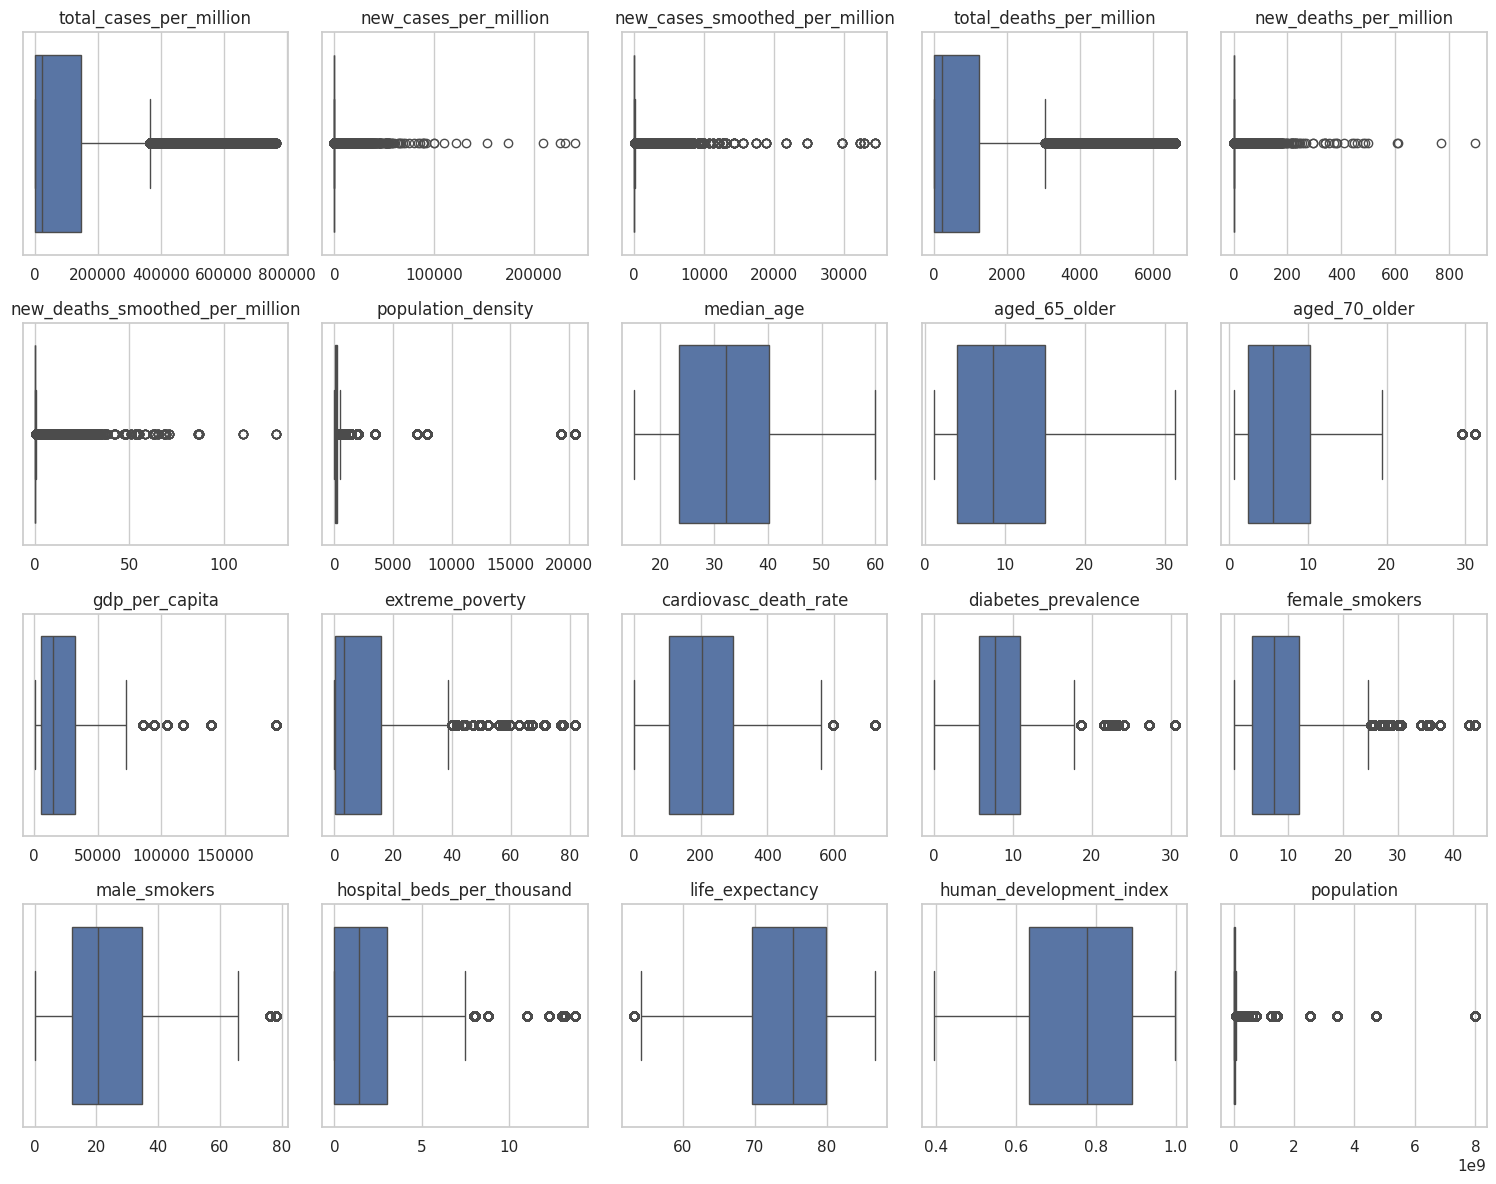

In [292]:
sns.set(style="whitegrid")

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_columns = 5
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 3, num_rows * 3))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [293]:
def handle_outliers_iqr(df, exclude_columns=None, multiplier=1.5):
    if exclude_columns is None:
        exclude_columns = ['iso_code', 'continent','location']

    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    numerical_columns = numerical_columns.drop(exclude_columns, errors='ignore')

    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"Outliers detected in '{column}': {outliers.index.tolist()}")

        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

df = handle_outliers_iqr(df, exclude_columns=['iso_code', 'continent','location'], multiplier=1.5)

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if column not in ['iso_code', 'continent','location']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        remaining_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not remaining_outliers.empty:
            print(f"Remaining outliers in '{column}': {remaining_outliers.index.tolist()}")
        else:
            print(f"No remaining outliers in '{column}'.")

Outliers detected in 'total_cases_per_million': [9112, 9113, 9114, 9115, 9116, 9117, 9118, 9119, 9120, 9121, 9122, 9123, 9124, 9125, 9126, 9127, 9128, 9129, 9130, 9131, 9132, 9133, 9134, 9135, 9136, 9137, 9138, 9139, 9140, 9141, 9142, 9143, 9144, 9145, 9146, 9147, 9148, 9149, 9150, 9151, 9152, 9153, 9154, 9155, 9156, 9157, 9158, 9159, 9160, 9161, 9162, 9163, 9164, 9165, 9166, 9167, 9168, 9169, 9170, 9171, 9172, 9173, 9174, 9175, 9176, 9177, 9178, 9179, 9180, 9181, 9182, 9183, 9184, 9185, 9186, 9187, 9188, 9189, 9190, 9191, 9192, 9193, 9194, 9195, 9196, 9197, 9198, 9199, 9200, 9201, 9202, 9203, 9204, 9205, 9206, 9207, 9208, 9209, 9210, 9211, 9212, 9213, 9214, 9215, 9216, 9217, 9218, 9219, 9220, 9221, 9222, 9223, 9224, 9225, 9226, 9227, 9228, 9229, 9230, 9231, 9232, 9233, 9234, 9235, 9236, 9237, 9238, 9239, 9240, 9241, 9242, 9243, 9244, 9245, 9246, 9247, 9248, 9249, 9250, 9251, 9252, 9253, 9254, 9255, 9256, 9257, 9258, 9259, 9260, 9261, 9262, 9263, 9264, 9265, 9266, 9267, 9268, 9269, 927

**Boxplot After Outlier**

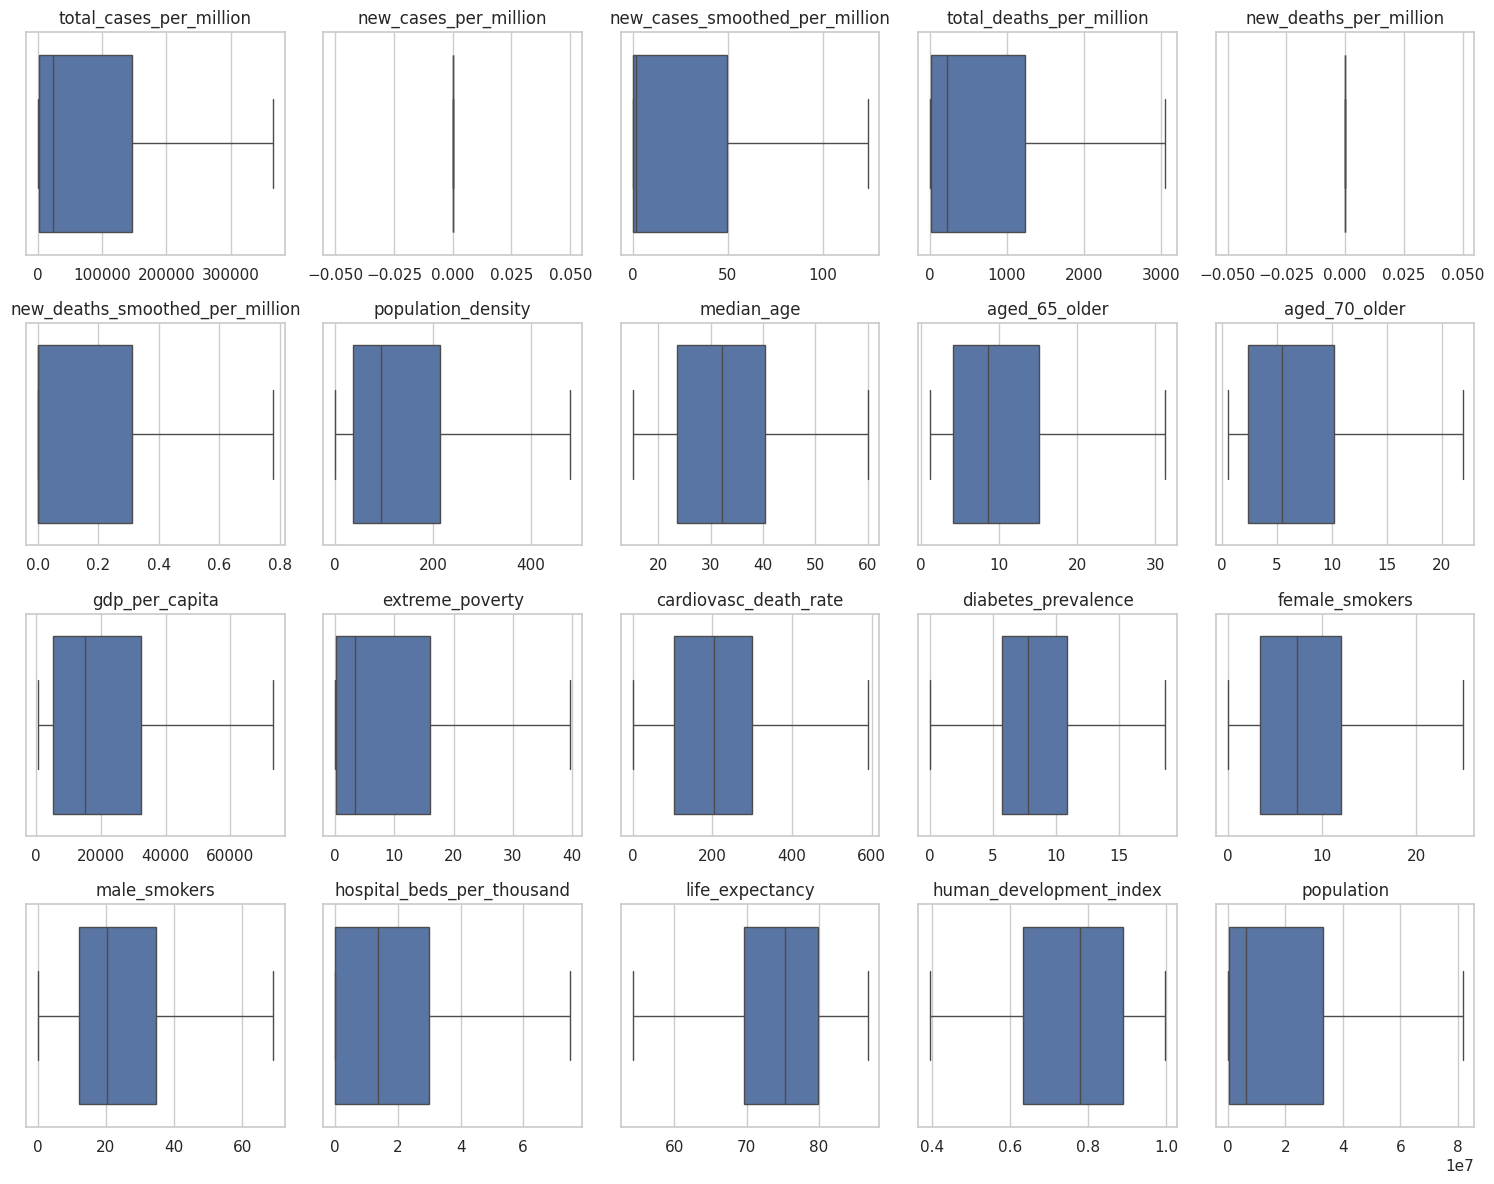

In [294]:
sns.set(style="whitegrid")

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_columns = 5
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 3, num_rows * 3))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

# **4. Visualization**

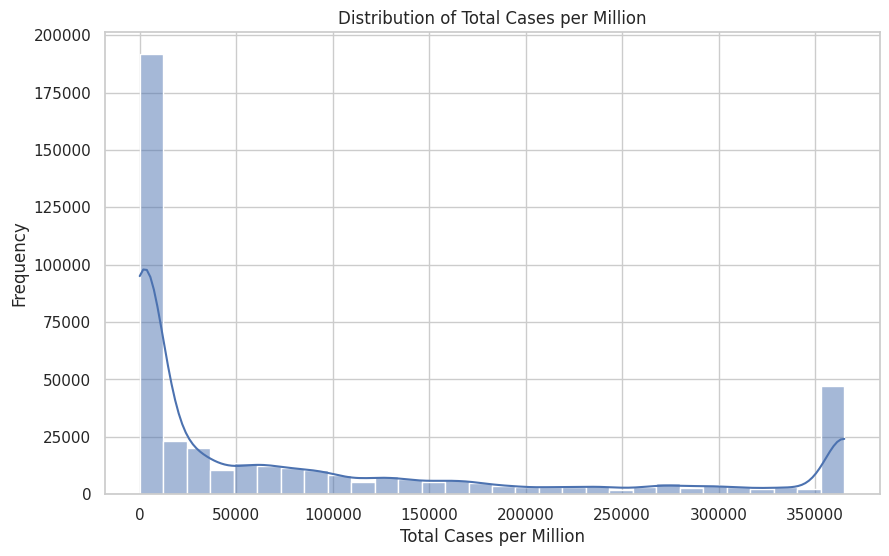

In [295]:
plt.figure(figsize=(10, 6))
sns.histplot(df['total_cases_per_million'], bins=30, kde=True)
plt.title('Distribution of Total Cases per Million')
plt.xlabel('Total Cases per Million')
plt.ylabel('Frequency')
plt.show()

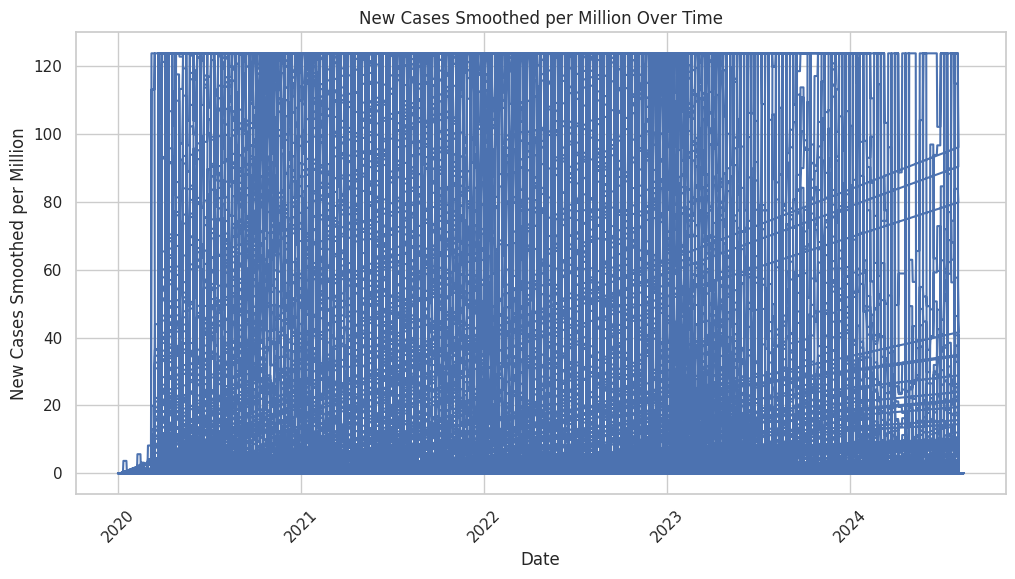

In [296]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['new_cases_smoothed_per_million'])
plt.title('New Cases Smoothed per Million Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases Smoothed per Million')
plt.xticks(rotation=45)
plt.show()


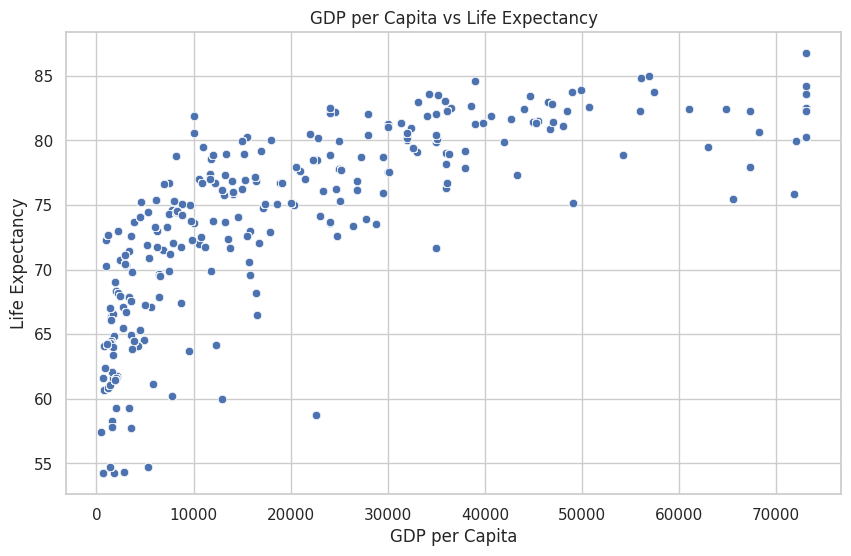

In [297]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['gdp_per_capita'], y=df['life_expectancy'])
plt.title('GDP per Capita vs Life Expectancy')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.show()


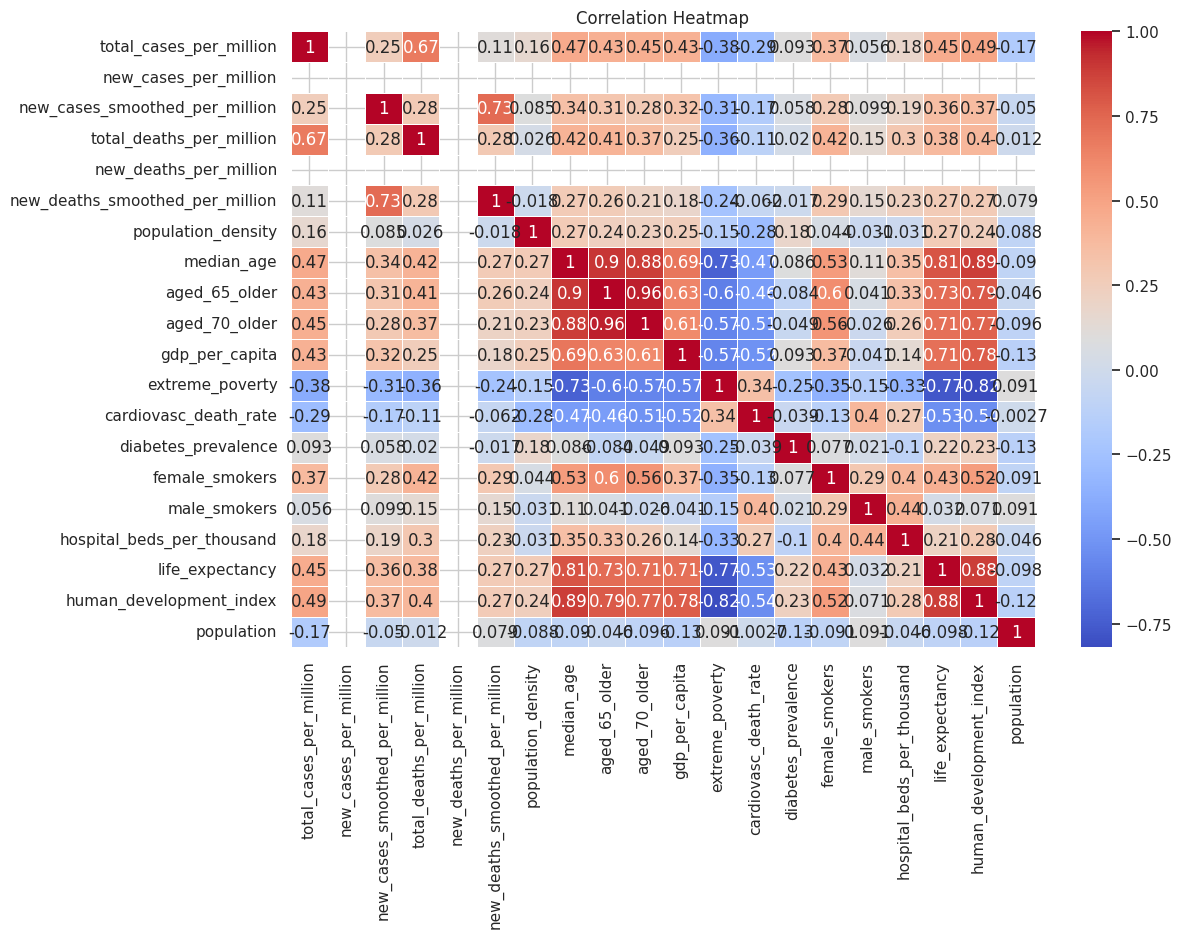

In [303]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

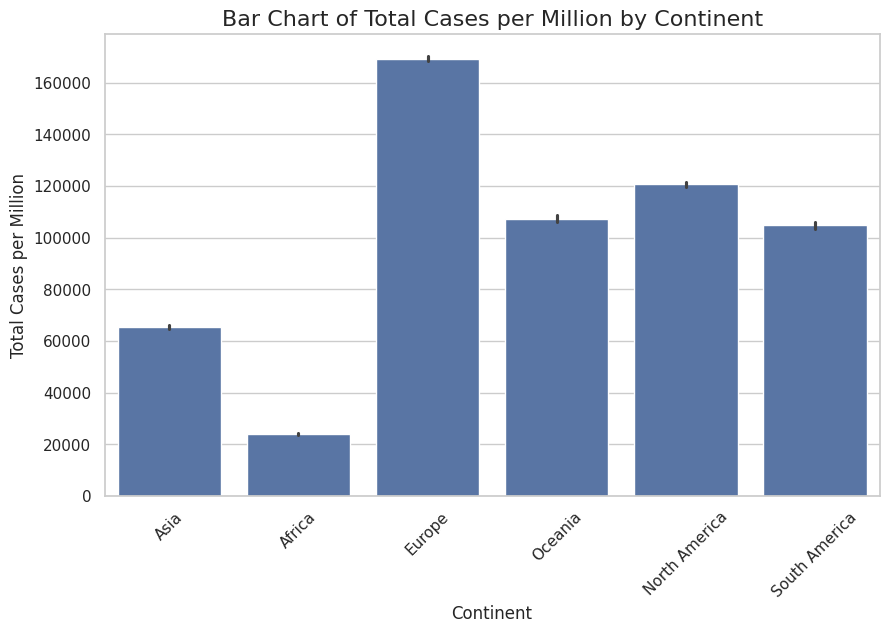

In [310]:

continents = ['Asia', 'Africa', 'Europe', 'Oceania', 'North America', 'South America']
filtered_df = df[df['continent'].isin(continents)]

plt.figure(figsize=(10, 6))

sns.barplot(x='continent', y='total_cases_per_million', data=filtered_df, estimator='mean')

plt.title('Bar Chart of Total Cases per Million by Continent', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Total Cases per Million', fontsize=12)
plt.xticks(rotation=45)

plt.show()


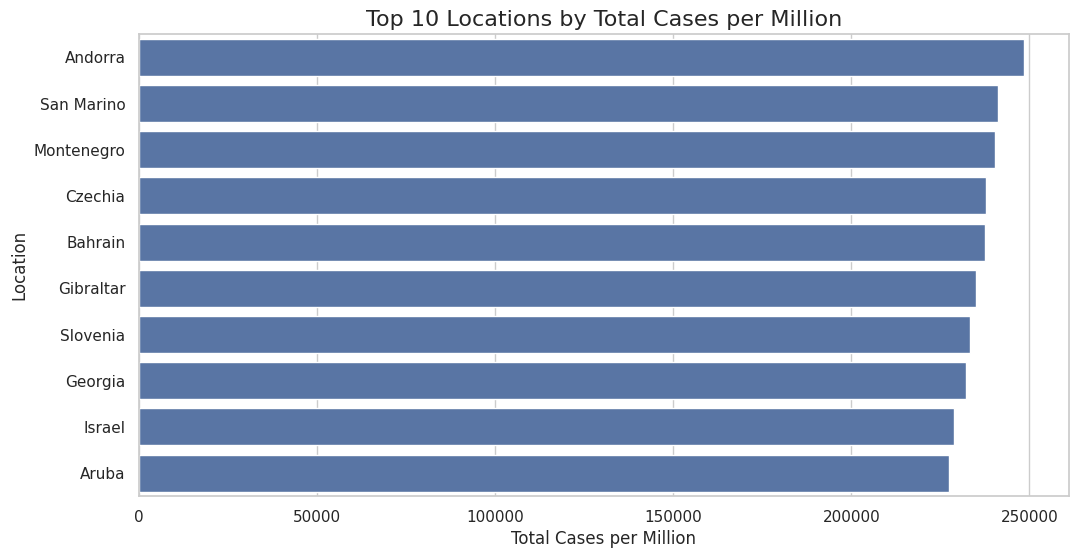

In [316]:
df_cleaned = df[['location', 'total_cases_per_million']].dropna()

aggregated_df = df_cleaned.groupby('location')['total_cases_per_million'].mean().reset_index()

top_10_locations = aggregated_df.sort_values(by='total_cases_per_million', ascending=False).head(10)

plt.figure(figsize=(12, 6))

sns.barplot(x='total_cases_per_million', y='location', data=top_10_locations)

plt.title('Top 10 Locations by Total Cases per Million', fontsize=16)
plt.xlabel('Total Cases per Million', fontsize=12)
plt.ylabel('Location', fontsize=12)

plt.show()


In [319]:
import plotly.express as px

location_counts = df['location'].value_counts().reset_index()
location_counts.columns = ['location', 'Count']

fig = px.choropleth(
    data_frame=location_counts,
    locations='location',
    locationmode='country names',
    color='location',
    hover_name='location',
    hover_data={'Count': True},
    scope='world',
    title='Covid 19 Count by location'
)

fig.show()

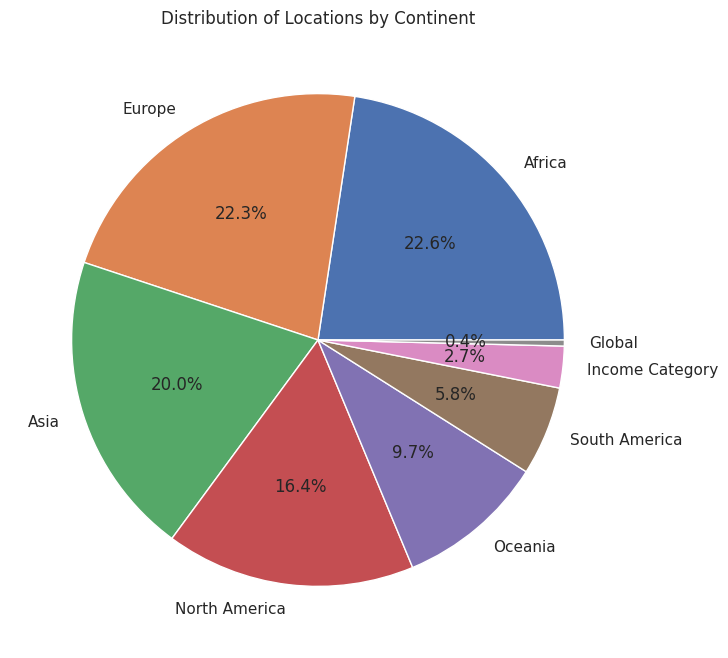

In [320]:
continent_counts = df['continent'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Locations by Continent')
plt.show()

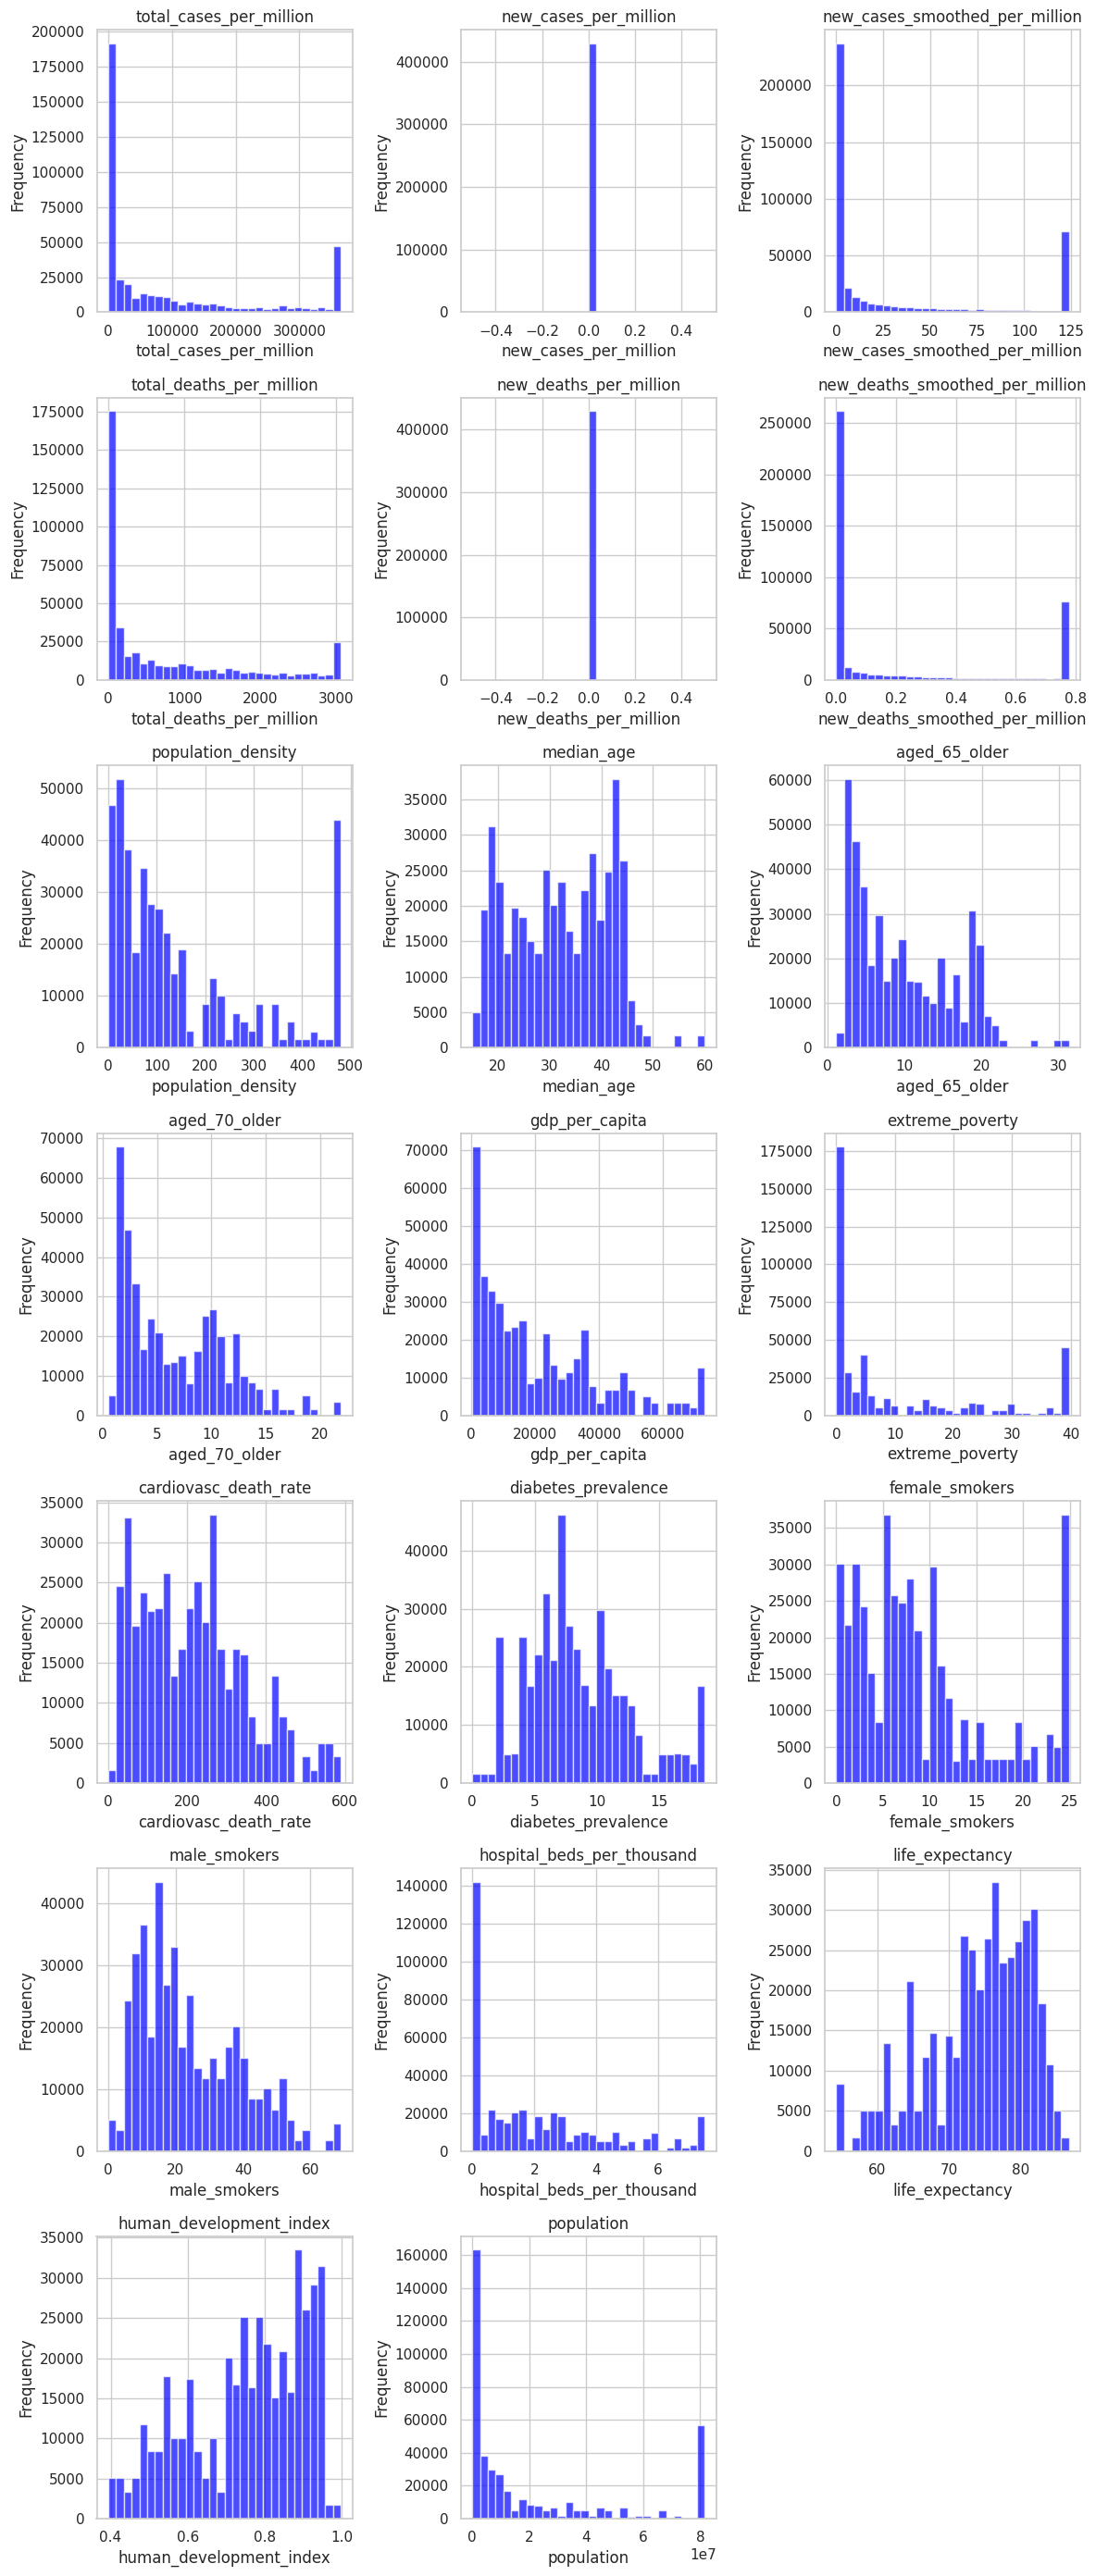

In [321]:
num_columns = 3
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 4, num_rows * 4))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    plt.hist(df[column], bins=30, color='blue', alpha=0.7)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Cleaned Data Saved as CSV**

In [322]:
df.to_csv('Cleaned_Emergio_EDA_Covid.csv', index=False)

# **5. Encoding**

In [326]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()

df['iso_code'] = label_encoder.fit_transform(df['iso_code'])
df['continent'] = label_encoder.fit_transform(df['continent'])
df['location'] = label_encoder.fit_transform(df['location'])

In [327]:
df.head()

iso_code  continent  location       date  total_cases_per_million  \
0         1          1         0 2020-01-05                      0.0   
1         1          1         0 2020-01-06                      0.0   
2         1          1         0 2020-01-07                      0.0   
3         1          1         0 2020-01-08                      0.0   
4         1          1         0 2020-01-09                      0.0   

   new_cases_per_million  new_cases_smoothed_per_million  \
0                    0.0                             0.0   
1                    0.0                             0.0   
2                    0.0                             0.0   
3                    0.0                             0.0   
4                    0.0                             0.0   

   total_deaths_per_million  new_deaths_per_million  \
0                       0.0                     0.0   
1                       0.0                     0.0   
2                       0.0                     0.0   
3                       0.0                     0.0   
4                       0.0                     0.0   

   new_deaths_smoothed_per_million  ...  gdp_per_capita  extreme_poverty  \
0                              0.0  ...        1803.987             39.7   
1                              0.0  ...        1803.987             39.7   
2                              0.0  ...        1803.987             39.7   
3                              0.0  ...        1803.987             39.7   
4                              0.0  ...        1803.987             39.7   

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0                589.677                 9.59             8.0          24.0   
1                589.677                 9.59             8.0          24.0   
2                589.677                 9.59             8.0          24.0   
3                589.677                 9.59             8.0          24.0   
4                589.677                 9.59             8.0          24.0   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   population  
0  41128772.0  
1  41128772.0  
2  41128772.0  
3  41128772.0  
4  41128772.0  

[5 rows x 24 columns]

# **6. Scaling**

In [328]:
from sklearn.preprocessing import StandardScaler

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [329]:
df.head()

iso_code  continent  location       date  total_cases_per_million  \
0 -1.724083  -0.681392 -1.722164 2020-01-05                -0.743315   
1 -1.724083  -0.681392 -1.722164 2020-01-06                -0.743315   
2 -1.724083  -0.681392 -1.722164 2020-01-07                -0.743315   
3 -1.724083  -0.681392 -1.722164 2020-01-08                -0.743315   
4 -1.724083  -0.681392 -1.722164 2020-01-09                -0.743315   

   new_cases_per_million  new_cases_smoothed_per_million  \
0                    0.0                       -0.661555   
1                    0.0                       -0.661555   
2                    0.0                       -0.661555   
3                    0.0                       -0.661555   
4                    0.0                       -0.661555   

   total_deaths_per_million  new_deaths_per_million  \
0                 -0.778237                     0.0   
1                 -0.778237                     0.0   
2                 -0.778237                     0.0   
3                 -0.778237                     0.0   
4                 -0.778237                     0.0   

   new_deaths_smoothed_per_million  ...  gdp_per_capita  extreme_poverty  \
0                        -0.635802  ...       -1.005346         2.188381   
1                        -0.635802  ...       -1.005346         2.188381   
2                        -0.635802  ...       -1.005346         2.188381   
3                        -0.635802  ...       -1.005346         2.188381   
4                        -0.635802  ...       -1.005346         2.188381   

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0               2.745052             0.270421       -0.162049     -0.008441   
1               2.745052             0.270421       -0.162049     -0.008441   
2               2.745052             0.270421       -0.162049     -0.008441   
3               2.745052             0.270421       -0.162049     -0.008441   
4               2.745052             0.270421       -0.162049     -0.008441   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                   -0.684017        -1.252132                -1.609171   
1                   -0.684017        -1.252132                -1.609171   
2                   -0.684017        -1.252132                -1.609171   
3                   -0.684017        -1.252132                -1.609171   
4                   -0.684017        -1.252132                -1.609171   

   population  
0    0.721319  
1    0.721319  
2    0.721319  
3    0.721319  
4    0.721319  

[5 rows x 24 columns]